In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display

In [389]:
#Read the data 
df1 = pd.read_csv('Sparkling.csv')

In [390]:
df1.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [391]:
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [392]:
df1.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [393]:
Time_Stamp = pd.date_range(start='1980-01-01',end='1995-01-01',freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-03-31', '1994-04-30', '1994-05-31', '1994-06-30',
               '1994-07-31', '1994-08-31', '1994-09-30', '1994-10-31',
               '1994-11-30', '1994-12-31'],
              dtype='datetime64[ns]', length=180, freq='M')

In [394]:
df1 = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [395]:
df1.dtypes

Sparkling    int64
dtype: object

In [396]:
df1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [397]:
df1.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

Plotting data

In [398]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

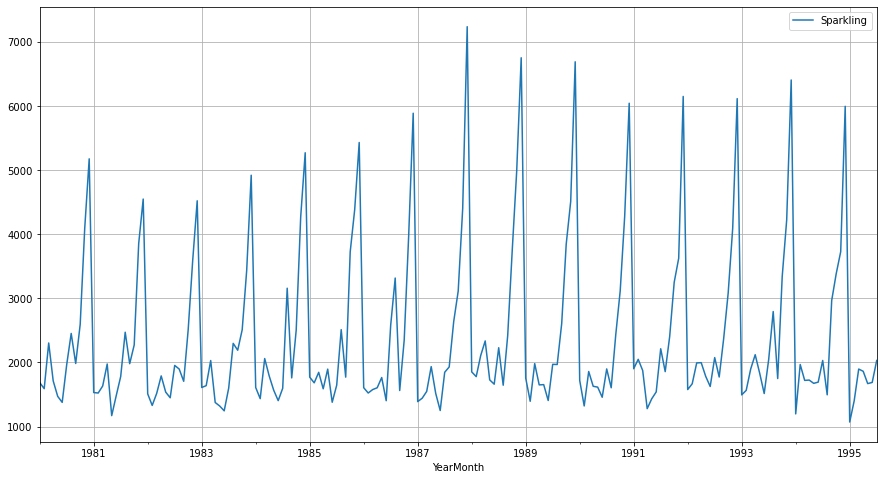

In [399]:
df1.plot();
plt.grid()

Plot a boxplot to understand the variation of Sales with respect to months across years.

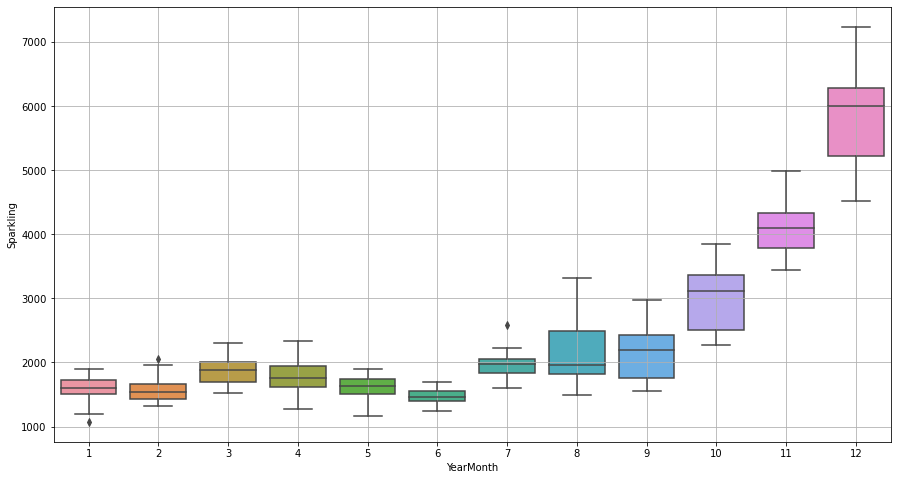

In [400]:
sns.boxplot(x=df1.index.month,y=df1['Sparkling'])
plt.grid();

In [401]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.month_name(), index = df1.index.year)
monthly_sales_across_years

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

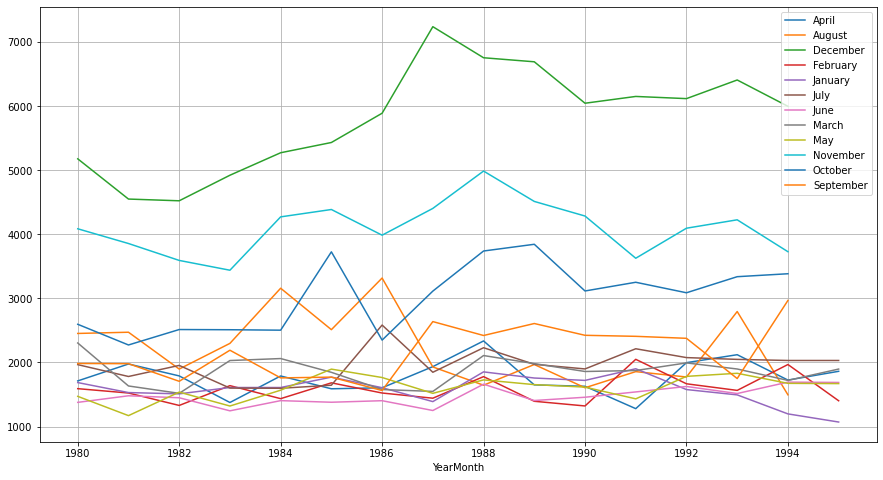

In [402]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

In [403]:
df1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

DECOMPOSE

In [404]:
from statsmodels.tsa.seasonal import seasonal_decompose

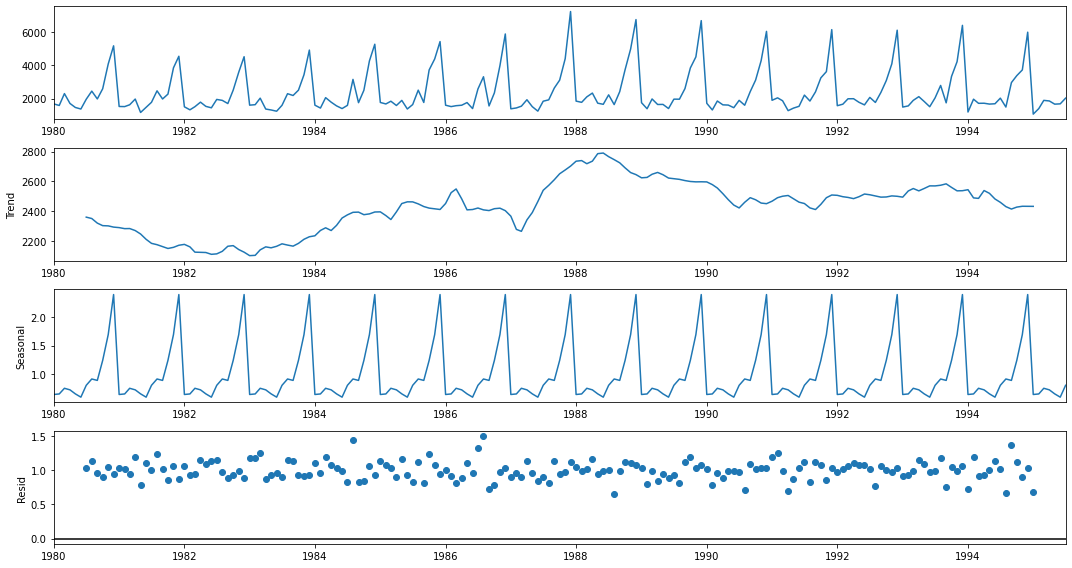

In [405]:
decomposition = seasonal_decompose(df1,model='multiplicative')
decomposition.plot();

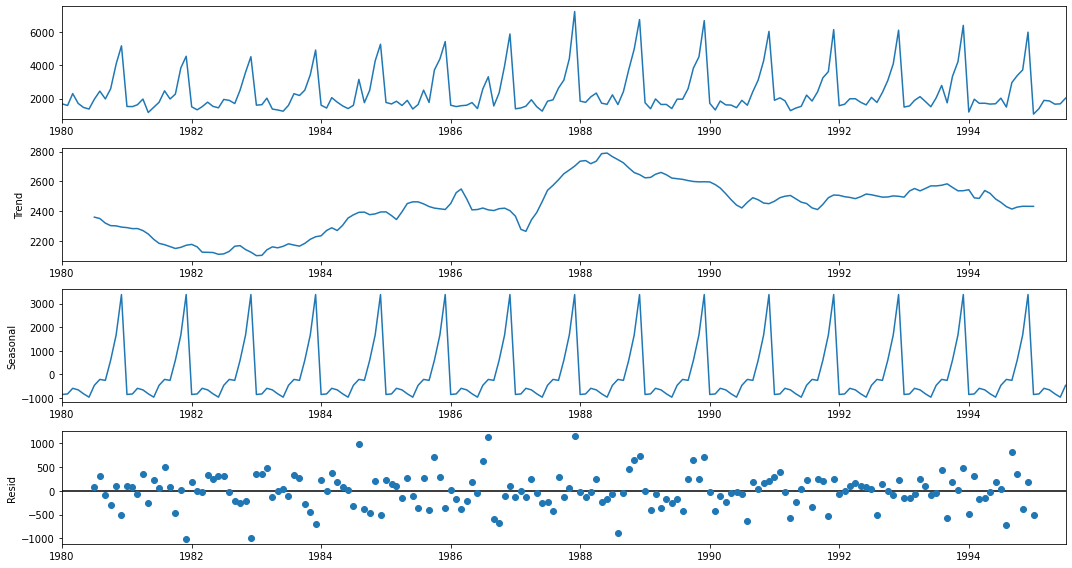

In [406]:
decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

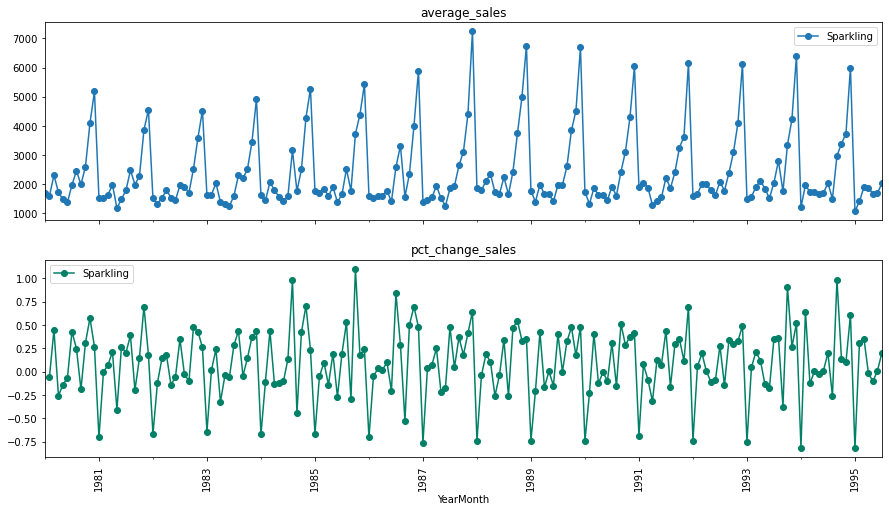

In [407]:
# group by date and get average Customers, and precent change
average_sales    = df1.groupby(df1.index)["Sparkling"].mean()
pct_change_sales = df1.groupby(df1.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="average_sales")

ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="pct_change_sales")

Splitting the data

In [408]:
train = df1[df1.index<'1991'] 
test = df1[df1.index>='1991']

In [409]:
print(train.head(),'\n')
print(train.tail(),'\n\n')
print(test.head(),'\n')
print(test.tail(),'\n')

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

            Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 


            Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

            Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [410]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [411]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [412]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07029459943040381,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.1004162520212,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [413]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.687529
1991-02-01    2804.687529
1991-03-01    2804.687529
1991-04-01    2804.687529
1991-05-01    2804.687529
1991-06-01    2804.687529
1991-07-01    2804.687529
1991-08-01    2804.687529
1991-09-01    2804.687529
1991-10-01    2804.687529
1991-11-01    2804.687529
1991-12-01    2804.687529
1992-01-01    2804.687529
1992-02-01    2804.687529
1992-03-01    2804.687529
1992-04-01    2804.687529
1992-05-01    2804.687529
1992-06-01    2804.687529
1992-07-01    2804.687529
1992-08-01    2804.687529
1992-09-01    2804.687529
1992-10-01    2804.687529
1992-11-01    2804.687529
1992-12-01    2804.687529
1993-01-01    2804.687529
1993-02-01    2804.687529
1993-03-01    2804.687529
1993-04-01    2804.687529
1993-05-01    2804.687529
1993-06-01    2804.687529
1993-07-01    2804.687529
1993-08-01    2804.687529
1993-09-01    2804.687529
1993-10-01    2804.687529
1993-11-01    2804.687529
1993-12-01    2804.687529
1994-01-01    2804.687529
1994-02-01    2804.687529
1994-03-01  

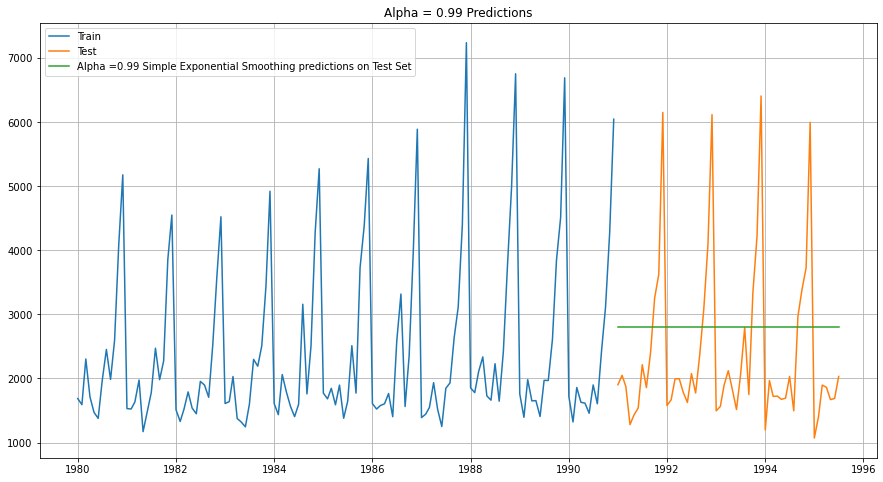

In [414]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [415]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [416]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1338.0121443910186
SES RMSE (calculated using statsmodels): 1338.0121443910189


In [417]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

Test RMSE
Alpha=0.99,SES  1338.012144

Holt - ETS(A, A, N) - Holt's linear method with additive error


Double Exponential Smoothing

In [418]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.6638769092832238, 'smoothing_trend': 9.966251357628782e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.5681711003654, 'initial_trend': 29.020225552837097, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [419]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5330.501799
1991-02-01    5359.520204
1991-03-01    5388.538609
1991-04-01    5417.557013
1991-05-01    5446.575418
1991-06-01    5475.593823
1991-07-01    5504.612228
1991-08-01    5533.630633
1991-09-01    5562.649038
1991-10-01    5591.667443
1991-11-01    5620.685847
1991-12-01    5649.704252
1992-01-01    5678.722657
1992-02-01    5707.741062
1992-03-01    5736.759467
1992-04-01    5765.777872
1992-05-01    5794.796277
1992-06-01    5823.814682
1992-07-01    5852.833086
1992-08-01    5881.851491
1992-09-01    5910.869896
1992-10-01    5939.888301
1992-11-01    5968.906706
1992-12-01    5997.925111
1993-01-01    6026.943516
1993-02-01    6055.961920
1993-03-01    6084.980325
1993-04-01    6113.998730
1993-05-01    6143.017135
1993-06-01    6172.035540
1993-07-01    6201.053945
1993-08-01    6230.072350
1993-09-01    6259.090754
1993-10-01    6288.109159
1993-11-01    6317.127564
1993-12-01    6346.145969
1994-01-01    6375.164374
1994-02-01    6404.182779
1994-03-01  

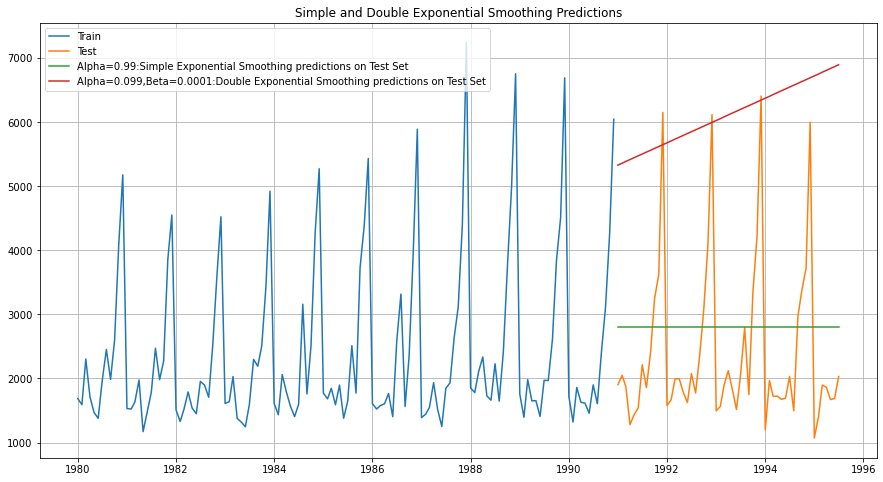

In [420]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [421]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 3949.993290409098


In [422]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.99,SES           1338.012144
Alpha=1,Beta=0.0189:DES  3949.993290

Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [423]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10005373820823961, 'smoothing_trend': 0.010034490652580457, 'smoothing_seasonal': 0.5095957543425532, 'damping_trend': nan, 'initial_level': 2364.584774604334, 'initial_trend': -0.016752880078245408, 'initial_seasons': array([-653.82559323, -736.67734144, -368.25456128, -483.63906084,
       -826.15467946, -832.96819741, -386.3751117 ,   91.82676187,
       -261.32455153,  265.38968222, 1580.26233564, 2619.56221896]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [424]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1509.969093
1991-02-01    1205.343244
1991-03-01    1702.386113
1991-04-01    1548.514691
1991-05-01    1467.824074
1991-06-01    1287.109239
1991-07-01    1804.027662
1991-08-01    1646.339830
1991-09-01    2326.596637
1991-10-01    3228.612283
1991-11-01    4303.269444
1991-12-01    6460.680111
1992-01-01    1505.580741
1992-02-01    1200.954892
1992-03-01    1697.997760
1992-04-01    1544.126339
1992-05-01    1463.435722
1992-06-01    1282.720887
1992-07-01    1799.639310
1992-08-01    1641.951478
1992-09-01    2322.208285
1992-10-01    3224.223931
1992-11-01    4298.881092
1992-12-01    6456.291759
1993-01-01    1501.192388
1993-02-01    1196.566540
1993-03-01    1693.609408
1993-04-01    1539.737987
1993-05-01    1459.047370
1993-06-01    1278.332535
1993-07-01    1795.250957
1993-08-01    1637.563125
1993-09-01    2317.819933
1993-10-01    3219.835579
1993-11-01    4294.492739
1993-12-01    6451.903407
1994-01-01    1496.804036
1994-02-01    1192.178188
1994-03-01  

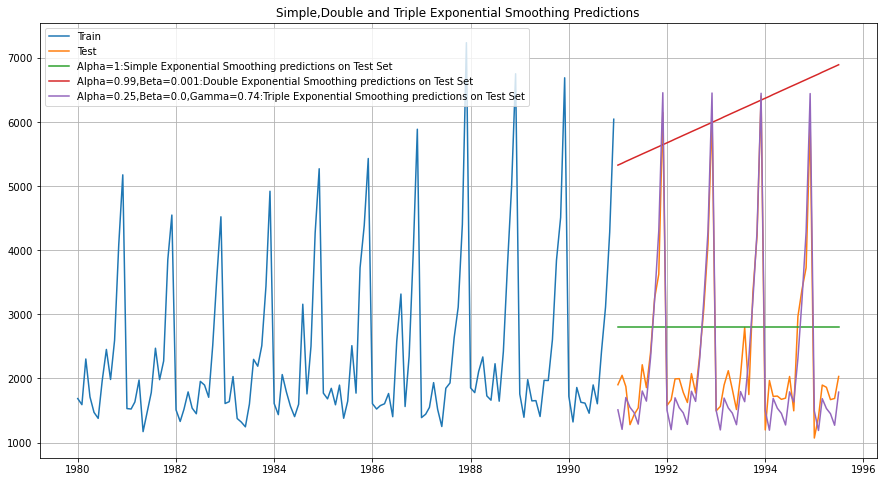

In [425]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [426]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 379.6956857387101


In [427]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.99,SES                      1338.012144
Alpha=1,Beta=0.0189:DES             3949.993290
Alpha=0.25,Beta=0.0,Gamma=0.74:TES   379.695686

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

In [428]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11194572287706502, 'smoothing_trend': 0.04979454913988668, 'smoothing_seasonal': 0.3616765678435302, 'damping_trend': nan, 'initial_level': 2356.340229937152, 'initial_trend': -10.519480221963526, 'initial_seasons': array([0.71465118, 0.68302129, 0.90263858, 0.80589958, 0.65660325,
       0.65654363, 0.88525948, 1.132562  , 0.92225104, 1.21110112,
       1.8820382 , 2.38194187]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [429]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    1586.782642
1991-02-01    1355.896477
1991-03-01    1762.095344
1991-04-01    1655.471900
1991-05-01    1541.320914
1991-06-01    1354.477040
1991-07-01    1853.306666
1991-08-01    1820.010020
1991-09-01    2275.925030
1991-10-01    3120.245508
1991-11-01    4126.116727
1991-12-01    5885.056602
1992-01-01    1536.931357
1992-02-01    1313.187030
1992-03-01    1706.444942
1992-04-01    1603.050911
1992-05-01    1492.385418
1992-06-01    1311.359584
1992-07-01    1794.152902
1992-08-01    1761.764092
1992-09-01    2202.893649
1992-10-01    3019.852559
1992-11-01    3993.003270
1992-12-01    5694.685845
1993-01-01    1487.080071
1993-02-01    1270.477583
1993-03-01    1650.794539
1993-04-01    1550.629921
1993-05-01    1443.449922
1993-06-01    1268.242128
1993-07-01    1734.999138
1993-08-01    1703.518165
1993-09-01    2129.862267
1993-10-01    2919.459610
1993-11-01    3859.889814
1993-12-01    5504.315087
1994-01-01    1437.228785
1994-02-01    1227.768135
1994-03-01  

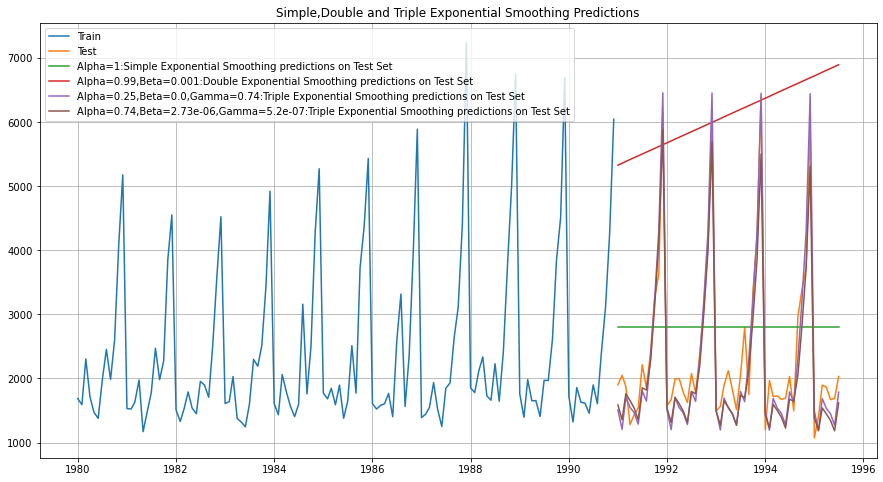

In [430]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

 Report model accuracy

In [431]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 406.51016963157673


In [432]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.99,SES                                      1338.012144
Alpha=1,Beta=0.0189:DES                             3949.993290
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   379.695686
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   406.510170

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set.

Linear Regression 

In [433]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


In [434]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [435]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   256
1991-02-01       2049   257
1991-03-01       1874   258
1991-04-01       1279   259
1991-05-01       1432   260

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   306
1995-04-01       1862   307
1995-05-01       1670   308
1995-06-01       1688   309
1995-07-01       2031   310

In [436]:
from sklearn.linear_model import LinearRegression

In [437]:
lr = LinearRegression()

In [438]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

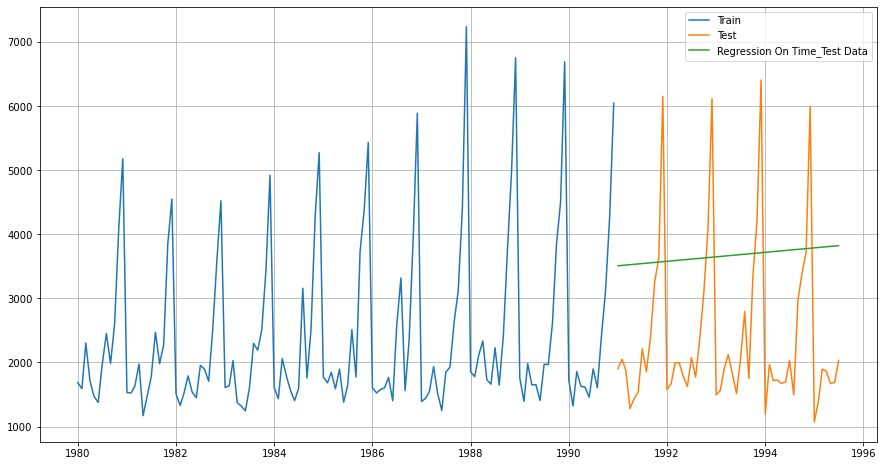

In [439]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [440]:
from sklearn import metrics

Model Evaluation

In [441]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1798.201 


In [442]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1798.2007

Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 

In [443]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [444]:
train.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [445]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

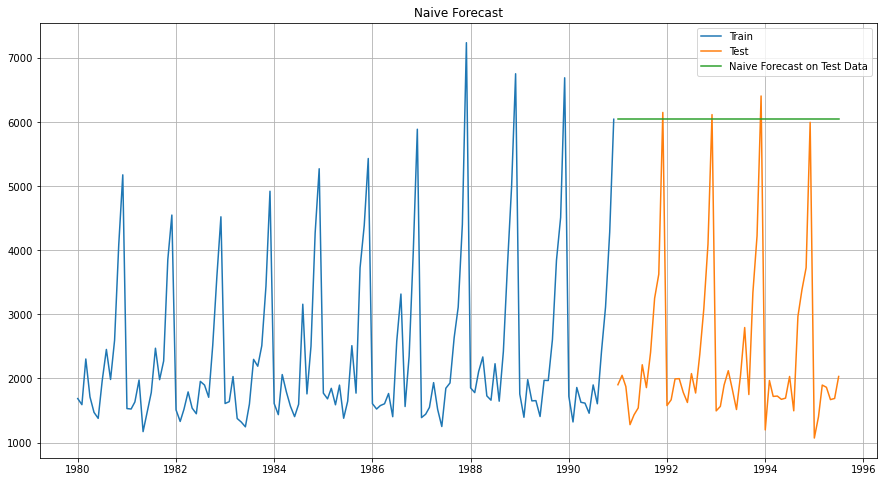

In [446]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

In [447]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [448]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1798.200700
NaiveModel        3864.279352

Simple Average

In [449]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [450]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

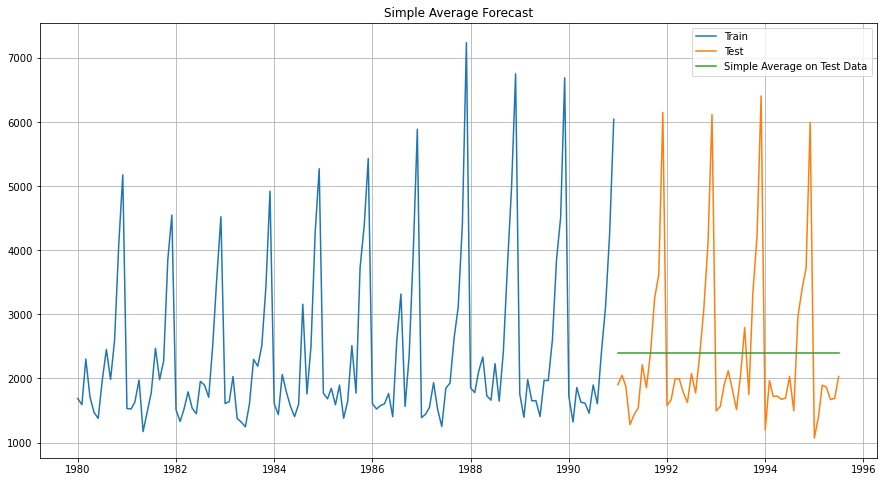

In [451]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Model Evaluation

In [452]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [453]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1798.200700
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

Moving Average(MA)

In [454]:
MovingAverage = df1.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [455]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

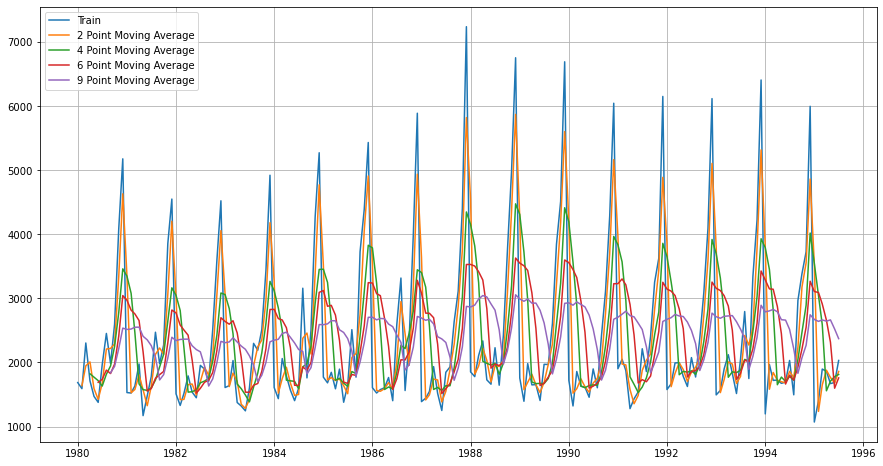

In [456]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [457]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

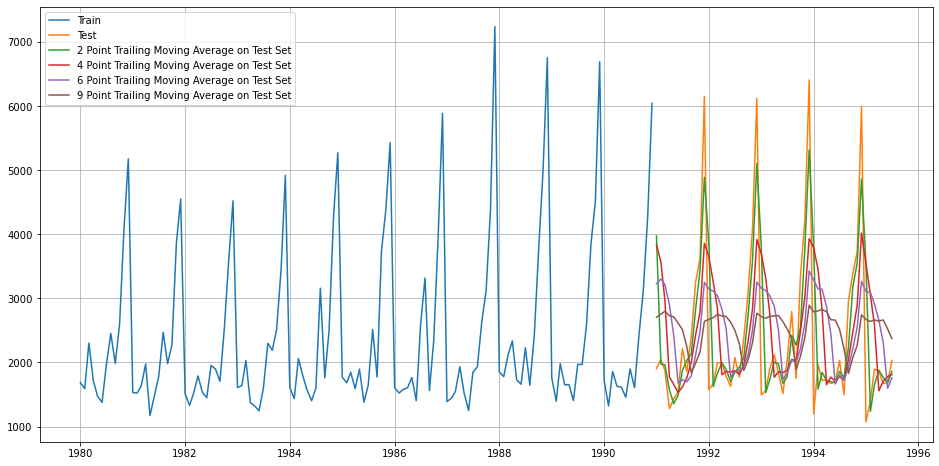

In [458]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

Model Evaluation

In [459]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [460]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1798.200700
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

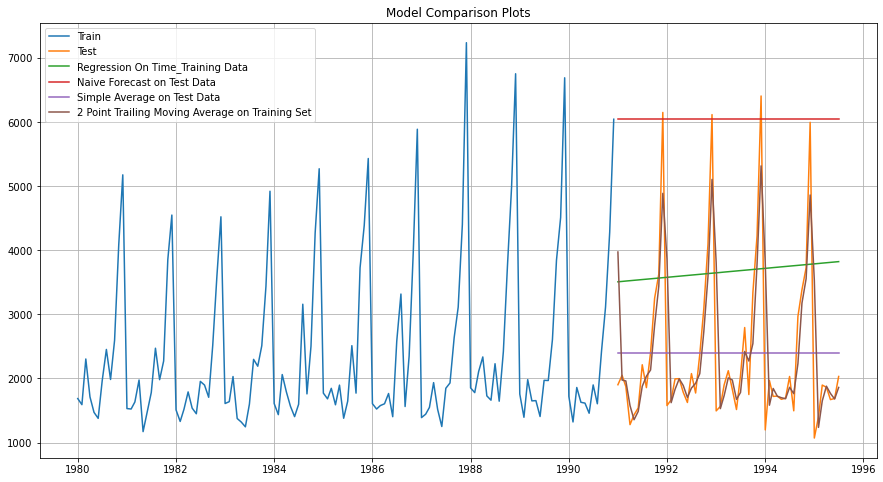

In [461]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

 Test for stationarity of the series - Dicky Fuller test


In [462]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

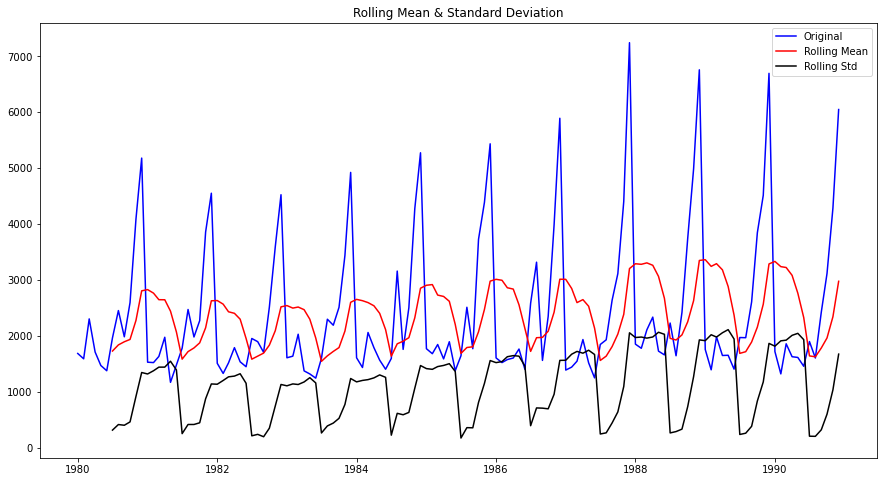

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [463]:
test_stationarity(train['Sparkling'])

We see that the data is not stationary. We will go ahead and take appropriate levels of differencing to make the data stationary.


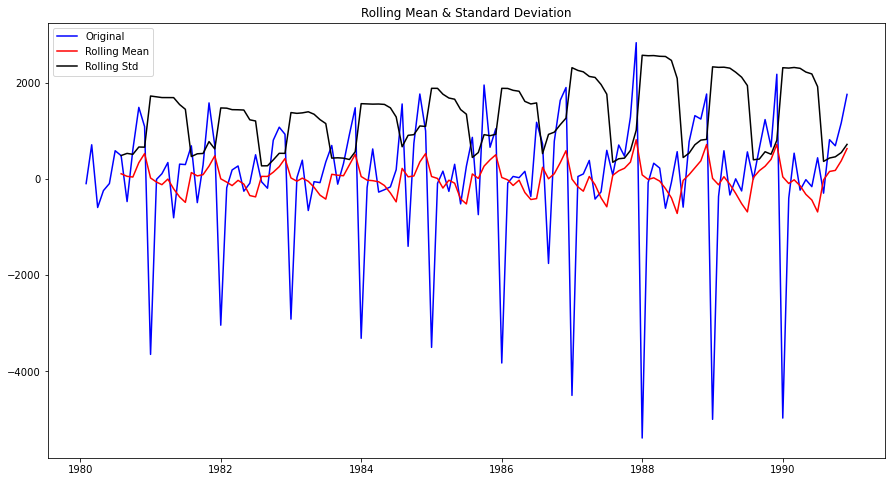

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [464]:
test_stationarity(train.diff().dropna())

ARIMA

In [465]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we have already taken a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [466]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [467]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323130674
ARIMA(0, 1, 3) - AIC:2233.9948577476116
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946742404
ARIMA(1, 1, 2) - AIC:2234.5272004519366


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 3) - AIC:2235.6078101124103
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776262581274
ARIMA(2, 1, 2) - AIC:2213.50921703971


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.983057575394
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4989865071907


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.7572943437854
ARIMA(3, 1, 3) - AIC:2221.4519770502657


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [468]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2213.509217
15  (3, 1, 3)  2221.451977
14  (3, 1, 2)  2230.757294
11  (2, 1, 3)  2232.983058
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)  2234.527200
13  (3, 1, 1)  2235.498987
7   (1, 1, 3)  2235.607810
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [469]:
mod = ARIMA(train['Sparkling'], order=(2,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 20 Feb 2022   AIC                           2213.509
Time:                        18:57:25   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.786      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.731      0.000      -0.701      -0.417
ma.L1         -1.9916      0.110    -18.184      0.0

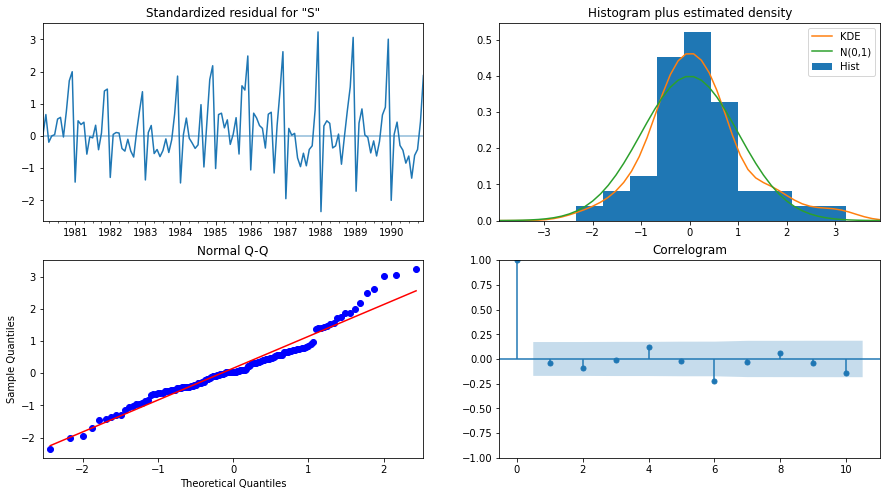

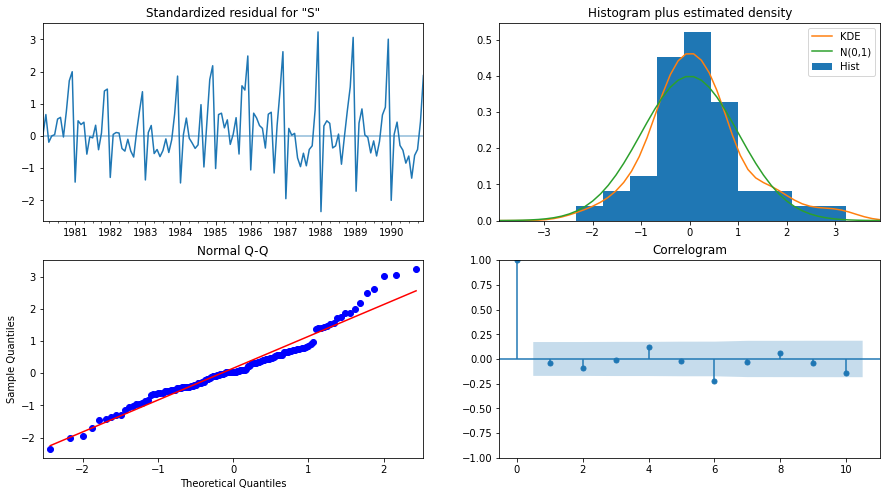

In [470]:
results_Arima.plot_diagnostics()

Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [471]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [472]:
from sklearn.metrics import mean_squared_error

In [473]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1991-01-01    4252.375165
1991-02-01    2863.125145
1991-03-01    2043.997950
1991-04-01    1746.212954
1991-05-01    1813.620943
1991-06-01    2068.618835
1991-07-01    2365.504675
1991-08-01    2612.433624
1991-09-01    2770.385423
1991-10-01    2839.529623
1991-11-01    2841.912672
1991-12-01    2806.367256
1992-01-01    2758.394680
1992-02-01    2715.329556
1992-03-01    2685.654076
1992-04-01    2670.802643
1992-05-01    2667.913281
1992-06-01    2672.428487
1992-07-01    2679.968981
1992-08-01    2687.337642
1992-09-01    2692.788798
1992-10-01    2695.820070
1992-11-01    2696.748629
1992-12-01    2696.271621
1993-01-01    2695.126389
1993-02-01    2693.890501
1993-03-01    2692.909397
1993-04-01    2692.313306
1993-05-01    2692.079893
1993-06-01    2692.107023
1993-07-01    2692.273167
1993-08-01    2692.475993
1993-09-01    2692.649202
1993-10-01    2692.763031
1993-11-01    2692.815512
1993-12-01    2692.820710
1994-01-01    2692.798177
1994-02-01    2692.765704
1994-03-01  

In [474]:
results_Arima.predict(start=pd.to_datetime('1991-01-01'),end=pd.to_datetime('1995-12-01 '),typ = 'level',dynamic=True,full_results=True)

1991-01-01    4252.375165
1991-02-01    2863.125145
1991-03-01    2043.997950
1991-04-01    1746.212954
1991-05-01    1813.620943
1991-06-01    2068.618835
1991-07-01    2365.504675
1991-08-01    2612.433624
1991-09-01    2770.385423
1991-10-01    2839.529623
1991-11-01    2841.912672
1991-12-01    2806.367256
1992-01-01    2758.394680
1992-02-01    2715.329556
1992-03-01    2685.654076
1992-04-01    2670.802643
1992-05-01    2667.913281
1992-06-01    2672.428487
1992-07-01    2679.968981
1992-08-01    2687.337642
1992-09-01    2692.788798
1992-10-01    2695.820070
1992-11-01    2696.748629
1992-12-01    2696.271621
1993-01-01    2695.126389
1993-02-01    2693.890501
1993-03-01    2692.909397
1993-04-01    2692.313306
1993-05-01    2692.079893
1993-06-01    2692.107023
1993-07-01    2692.273167
1993-08-01    2692.475993
1993-09-01    2692.649202
1993-10-01    2692.763031
1993-11-01    2692.815512
1993-12-01    2692.820710
1994-01-01    2692.798177
1994-02-01    2692.765704
1994-03-01  

In [475]:
RMSE_autoARIMA = mean_squared_error(test['Sparkling'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['Sparkling'],predicted_autoARIMA)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 1299.980372953183 
MAPE for the autofit ARIMA model: 43.2


In [476]:
resultsDf = pd.DataFrame({'RMSE': [RMSE_autoARIMA],'MAPE':[MAPE_autoARIMA]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

RMSE  MAPE
ARIMA(2,1,2)  1299.980373  43.2

Build an Automated version of an SARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [477]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [478]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [479]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076171629
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.635553689071
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.784515497332
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984443091
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111440978
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.392909486036
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510511
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657544
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425549457
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155268
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6879953816454
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858031943
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138759447605
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1763.2674862123888
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1744.0407537408987
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:1661.5703182417922
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1676.1994485026514
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:1678.5274447884733
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1661.2560702613468
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1663.3315077024708
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2176.8681144920774
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2068.7781454183796
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.787540459286
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1797.0726419076705
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.110221760579
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.6058949688763
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1826.0433798717777
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1715.810574057602
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.2783297130923
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1760.82674496632
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1729.1785943398436
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AI

In [480]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
187  (2, 1, 3)  (2, 0, 3, 6)  1632.639242
59   (0, 1, 3)  (2, 0, 3, 6)  1633.327889
251  (3, 1, 3)  (2, 0, 3, 6)  1634.597834
63   (0, 1, 3)  (3, 0, 3, 6)  1635.102973
123  (1, 1, 3)  (2, 0, 3, 6)  1635.428147

In [481]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -805.320
Date:                           Sun, 20 Feb 2022   AIC                           1632.639
Time:                                   19:00:34   BIC                           1662.244
Sample:                               01-01-1980   HQIC                          1644.645
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1887      0.032    -37.036      0.000      -1.252      -1.126
ar.L2         -0.9412      0.045    -20.715

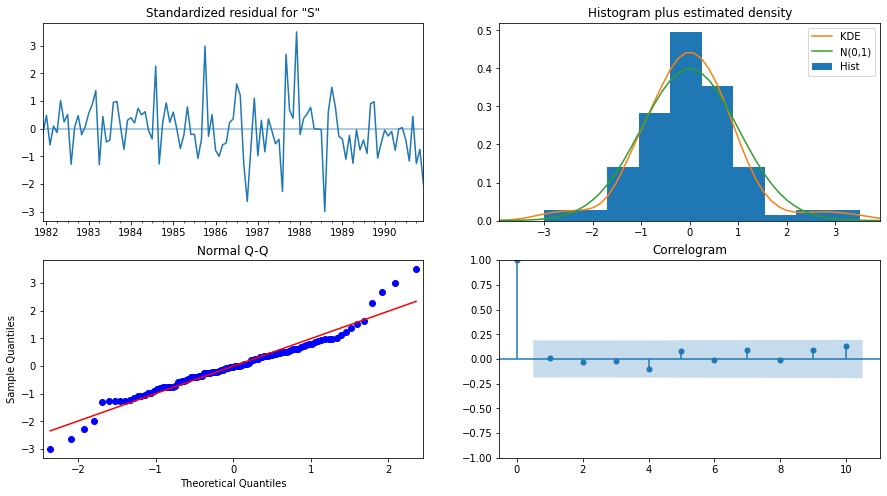

In [482]:
results_auto_SARIMA.plot_diagnostics();

Predict on the Test Set using this model and evaluate the model.

In [483]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [484]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1382.472211  377.135550     643.300116    2121.644307
1991-02-01   951.755919  387.026084     193.198732    1710.313106
1991-03-01  1658.940831  388.434796     897.622621    2420.259041
1991-04-01  1539.859946  391.879707     771.789835    2307.930057
1991-05-01  1273.580555  400.121961     489.355922    2057.805188

In [485]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = MAPE(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 737.8558108396751 
MAPE: 26.6


In [486]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE  MAPE
ARIMA(2,1,2)            1299.980373  43.2
SARIMA(2,1,3)(2,0,3,6)   737.855811  26.6

Check the ACF and PACF of the training data.

In [487]:
train_diff = train.diff(periods=1).dropna()
train_diff

Sparkling
YearMonth            
1980-02-01      -95.0
1980-03-01      713.0
1980-04-01     -592.0
1980-05-01     -241.0
1980-06-01      -94.0
...               ...
1990-08-01     -294.0
1990-09-01      819.0
1990-10-01      692.0
1990-11-01     1170.0
1990-12-01     1761.0

[131 rows x 1 columns]

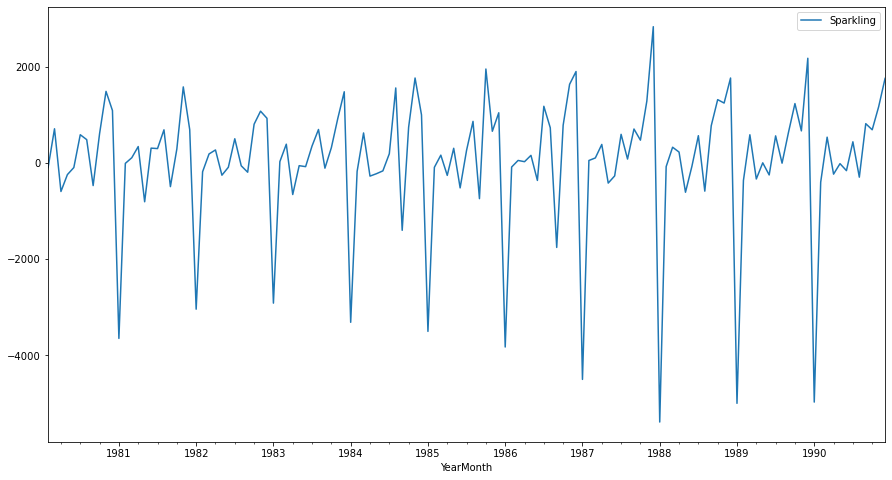

In [488]:
train_diff.plot();

In [489]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

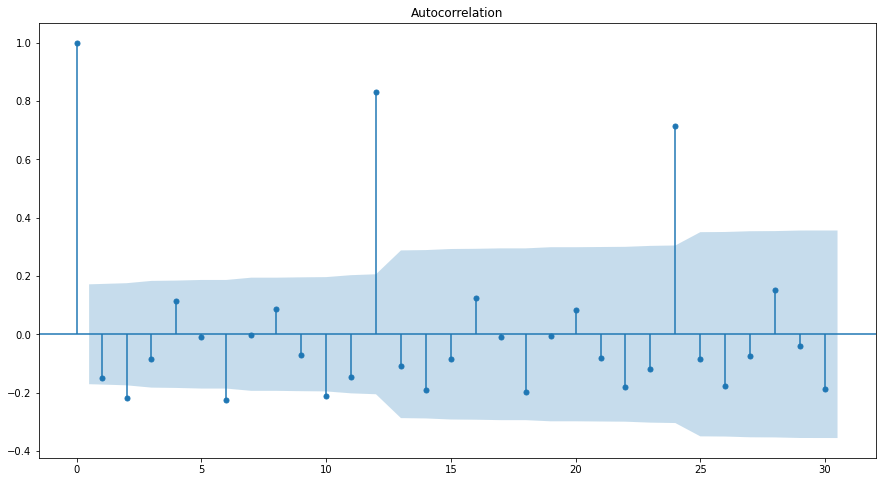

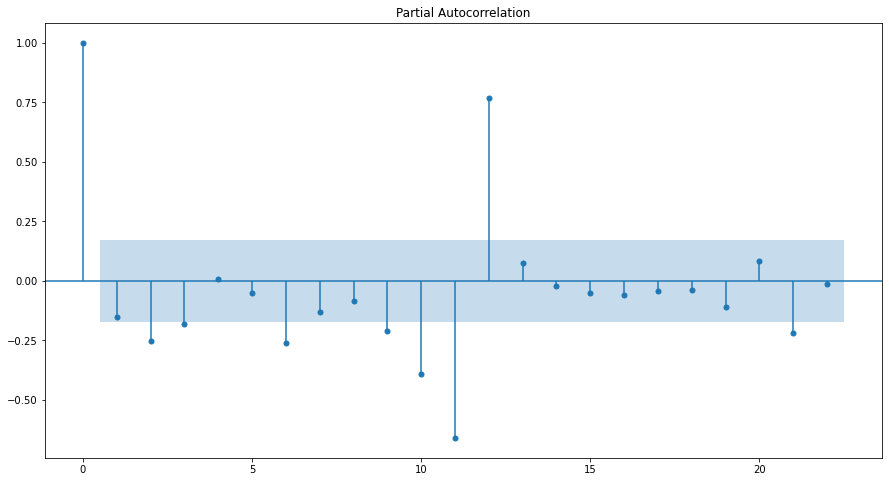

In [490]:
plot_acf(train_diff,lags=30)
plot_pacf(train_diff);

Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

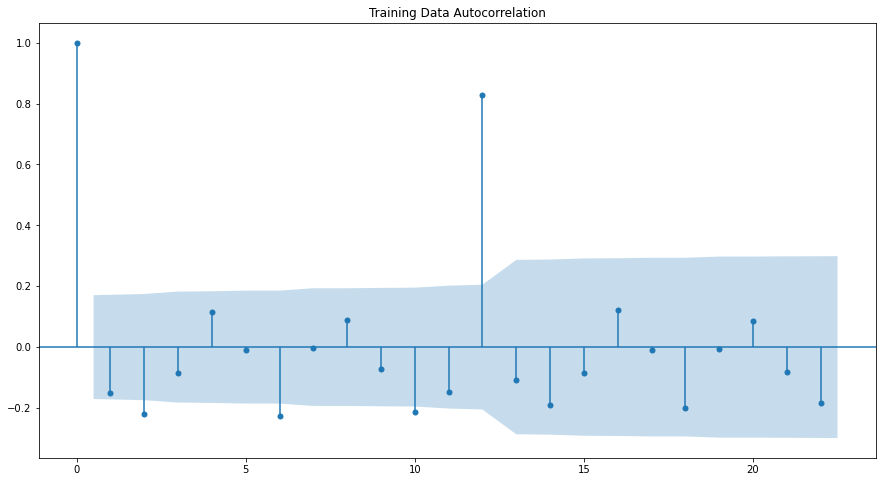

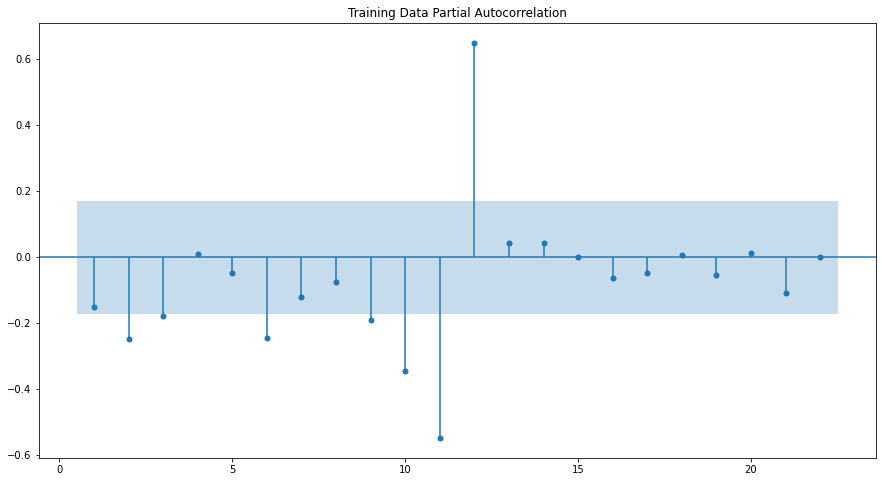

In [491]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 1.

By looking at the above plots, we will take the value of p and q to be 2 and 1 respectively.

In [509]:
mod = ARIMA(train['Sparkling'], order=(2,1,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1112.889
Date:                Sun, 20 Feb 2022   AIC                           2233.778
Time:                        19:15:32   BIC                           2245.278
Sample:                    01-01-1980   HQIC                          2238.451
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5194      0.119      4.359      0.000       0.286       0.753
ar.L2         -0.1782      0.196     -0.908      0.364      -0.563       0.206
ma.L1         -0.9993      0.667     -1.499      0.1

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


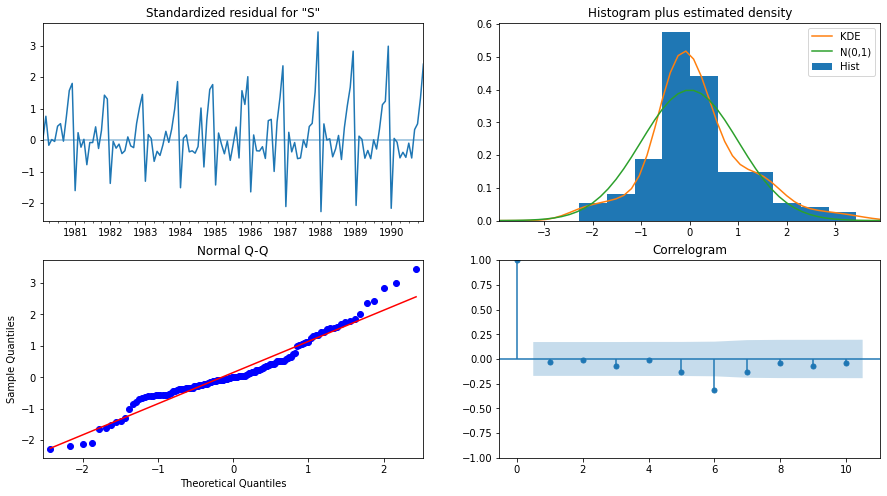

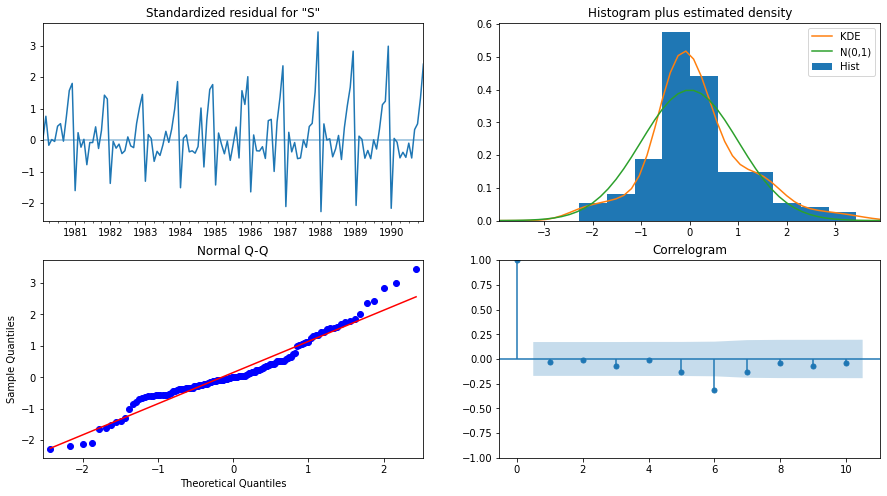

In [510]:
results_Arima.plot_diagnostics()

Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [511]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [512]:
from sklearn.metrics import mean_squared_error

In [513]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1991-01-01    3957.667373
1991-02-01    2558.511611
1991-03-01    2204.093599
1991-04-01    2269.356401
1991-05-01    2366.423298
1991-06-01    2405.213100
1991-07-01    2408.062649
1991-08-01    2402.629524
1991-09-01    2399.299432
1991-10-01    2398.537940
1991-11-01    2398.735890
1991-12-01    2398.974432
1992-01-01    2399.063063
1992-02-01    2399.066588
1992-03-01    2399.052623
1992-04-01    2399.044740
1992-05-01    2399.043135
1992-06-01    2399.043706
1992-07-01    2399.044288
1992-08-01    2399.044489
1992-09-01    2399.044490
1992-10-01    2399.044454
1992-11-01    2399.044436
1992-12-01    2399.044432
1993-01-01    2399.044434
1993-02-01    2399.044435
1993-03-01    2399.044436
1993-04-01    2399.044436
1993-05-01    2399.044436
1993-06-01    2399.044436
1993-07-01    2399.044436
1993-08-01    2399.044436
1993-09-01    2399.044436
1993-10-01    2399.044436
1993-11-01    2399.044436
1993-12-01    2399.044436
1994-01-01    2399.044436
1994-02-01    2399.044436
1994-03-01  

In [514]:
results_Arima.predict(start=pd.to_datetime('1991-01-01'),end=pd.to_datetime('1995-12-01 '),typ = 'level',dynamic=True,full_results=True)


1991-01-01    3957.667373
1991-02-01    2558.511611
1991-03-01    2204.093599
1991-04-01    2269.356401
1991-05-01    2366.423298
1991-06-01    2405.213100
1991-07-01    2408.062649
1991-08-01    2402.629524
1991-09-01    2399.299432
1991-10-01    2398.537940
1991-11-01    2398.735890
1991-12-01    2398.974432
1992-01-01    2399.063063
1992-02-01    2399.066588
1992-03-01    2399.052623
1992-04-01    2399.044740
1992-05-01    2399.043135
1992-06-01    2399.043706
1992-07-01    2399.044288
1992-08-01    2399.044489
1992-09-01    2399.044490
1992-10-01    2399.044454
1992-11-01    2399.044436
1992-12-01    2399.044432
1993-01-01    2399.044434
1993-02-01    2399.044435
1993-03-01    2399.044436
1993-04-01    2399.044436
1993-05-01    2399.044436
1993-06-01    2399.044436
1993-07-01    2399.044436
1993-08-01    2399.044436
1993-09-01    2399.044436
1993-10-01    2399.044436
1993-11-01    2399.044436
1993-12-01    2399.044436
1994-01-01    2399.044436
1994-02-01    2399.044436
1994-03-01  

In [515]:
RMSE_autoARIMA = mean_squared_error(test['Sparkling'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['Sparkling'],predicted_autoARIMA)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 1300.7213869695265 
MAPE for the autofit ARIMA model: 39.86


In [516]:
resultsDf = pd.DataFrame({'RMSE': [RMSE_autoARIMA],'MAPE':[MAPE_autoARIMA]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

RMSE   MAPE
ARIMA(2,1,2)  1300.721387  39.86

SARIMA using ACF and PACF

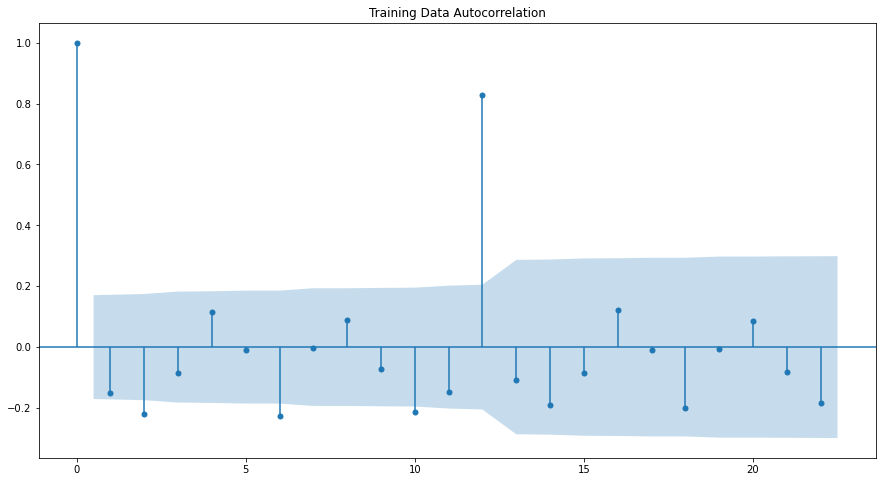

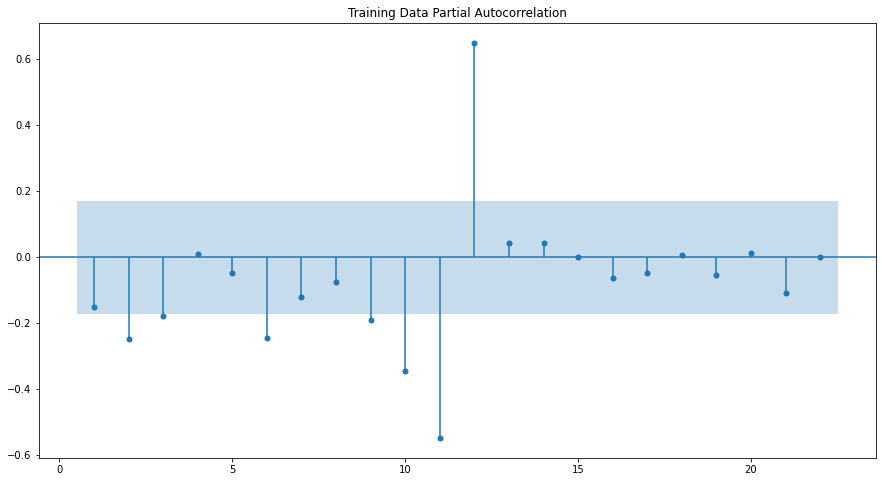

In [517]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6. We are taking the p value to be 2 and the q value also to be 1 as the parameters same as the SARIMA model.


In [518]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2,1,1),
                                seasonal_order=(0, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [519]:
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(0, 0, 1, 6)   Log Likelihood               -1046.543
Date:                           Sun, 20 Feb 2022   AIC                           2103.086
Time:                                   19:16:07   BIC                           2117.147
Sample:                               01-01-1980   HQIC                          2108.797
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4705      0.166      2.834      0.005       0.145       0.796
ar.L2         -0.2088      0.249     -0.840

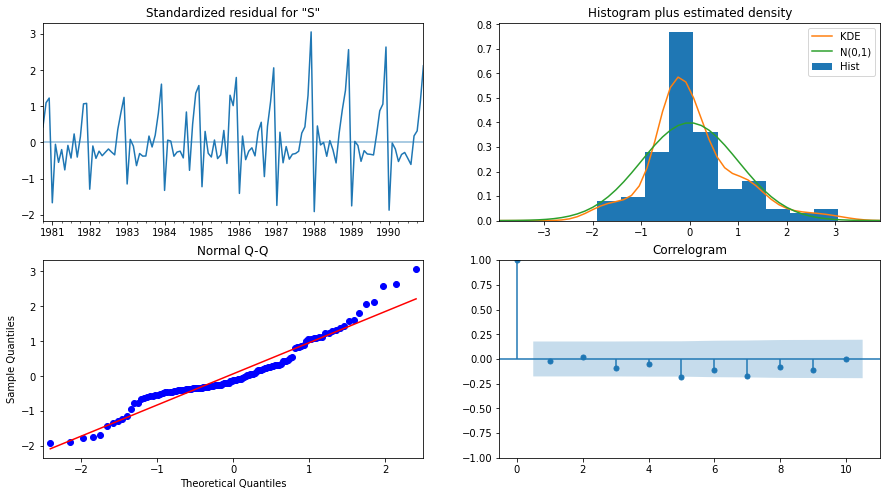

In [520]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [521]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = MAPE(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(2,1,1)(0,0,1,6)'])


RMSE: 1298.9177602107213 
MAPE: 42.4


In [522]:
resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE   MAPE
ARIMA(2,1,2)            1300.721387  39.86
SARIMA(2,1,1)(0,0,1,6)  1298.917760  42.40

--------------------------------------------------------------------------------------------------------------------------------

DATASET 'Rose'

In [322]:
#Read the data 
df2 = pd.read_csv('Rose.csv')

In [323]:
df2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [324]:
df2.dtypes

YearMonth     object
Rose         float64
dtype: object

In [325]:
Time_Stamp = pd.date_range(start='1980-01-01',end='1995-01-01',freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-03-31', '1994-04-30', '1994-05-31', '1994-06-30',
               '1994-07-31', '1994-08-31', '1994-09-30', '1994-10-31',
               '1994-11-30', '1994-12-31'],
              dtype='datetime64[ns]', length=180, freq='M')

In [151]:
df2 = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [152]:
df2.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [153]:
df2.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [154]:
df2.dtypes

Rose    float64
dtype: object

In [155]:
df2.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [156]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

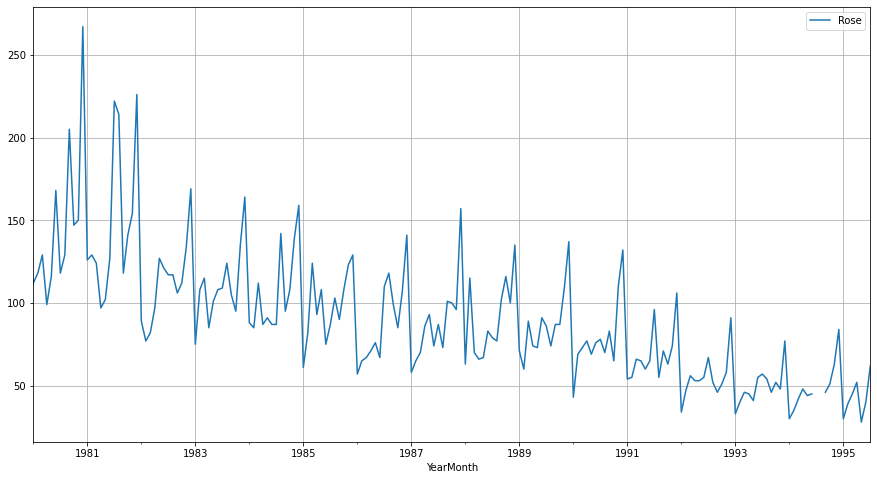

In [157]:
df2.plot();
plt.grid()

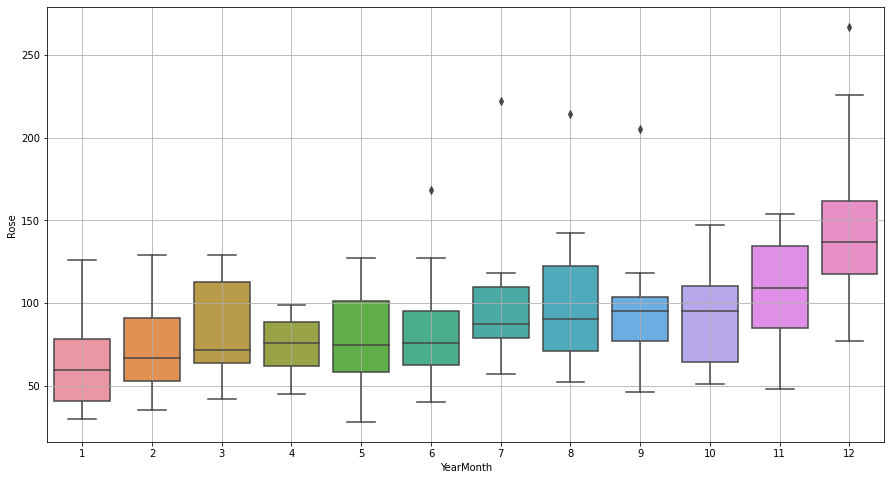

In [158]:
sns.boxplot(x=df2.index.month,y=df2['Rose'])
plt.grid();

In [159]:
monthly_sales_across_years = pd.pivot_table(df2, values = 'Rose', columns = df2.index.month_name(), index = df2.index.year)
monthly_sales_across_years

YearMonth  April  August  December  February  January   July   June  March  \
YearMonth                                                                    
1980        99.0   129.0     267.0     118.0    112.0  118.0  168.0  129.0   
1981        97.0   214.0     226.0     129.0    126.0  222.0  127.0  124.0   
1982        97.0   117.0     169.0      77.0     89.0  117.0  121.0   82.0   
1983        85.0   124.0     164.0     108.0     75.0  109.0  108.0  115.0   
1984        87.0   142.0     159.0      85.0     88.0   87.0   87.0  112.0   
1985        93.0   103.0     129.0      82.0     61.0   87.0   75.0  124.0   
1986        71.0   118.0     141.0      65.0     57.0  110.0   67.0   67.0   
1987        86.0    73.0     157.0      65.0     58.0   87.0   74.0   70.0   
1988        66.0    77.0     135.0     115.0     63.0   79.0   83.0   70.0   
1989        74.0    74.0     137.0      60.0     71.0   86.0   91.0   89.0   
1990        77.0    70.0     132.0      69.0     43.0   78.0   76.0   73.0   
1991        65.0    55.0     106.0      55.0     54.0   96.0   65.0   66.0   
1992        53.0    52.0      91.0      47.0     34.0   67.0   55.0   56.0   
1993        45.0    54.0      77.0      40.0     33.0   57.0   55.0   46.0   
1994        48.0     NaN      84.0      35.0     30.0    NaN   45.0   42.0   
1995        52.0     NaN       NaN      39.0     30.0   62.0   40.0   45.0   

YearMonth    May  November  October  September  
YearMonth                                       
1980       116.0     150.0    147.0      205.0  
1981       102.0     154.0    141.0      118.0  
1982       127.0     134.0    112.0      106.0  
1983       101.0     135.0     95.0      105.0  
1984        91.0     139.0    108.0       95.0  
1985       108.0     123.0    108.0       90.0  
1986        76.0     107.0     85.0       99.0  
1987        93.0      96.0    100.0      101.0  
1988        67.0     100.0    116.0      102.0  
1989        73.0     109.0     87.0       87.0  
1990        69.0     110.0     65.0       83.0  
1991        60.0      74.0     63.0       71.0  
1992        53.0      58.0     51.0       46.0  
1993        41.0      48.0     52.0       46.0  
1994        44.0      63.0     51.0       46.0  
1995        28.0       NaN      NaN        NaN

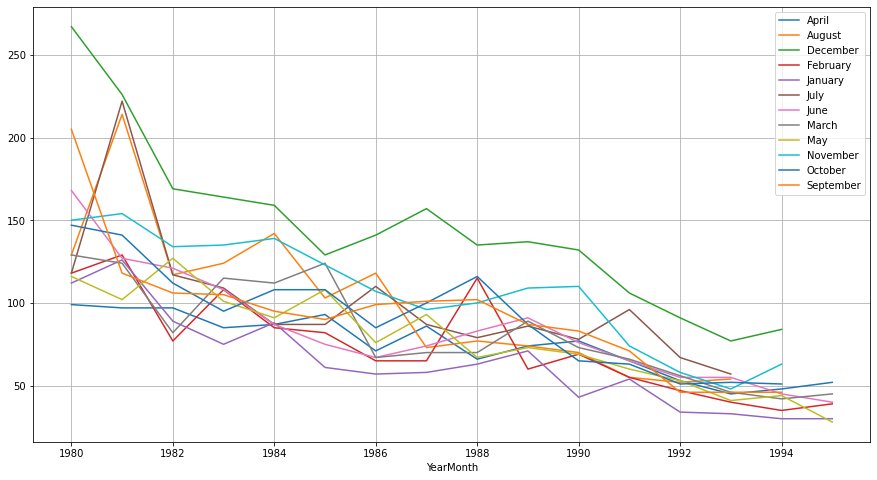

In [160]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

In [161]:
df2.isna().sum()

Rose    2
dtype: int64

Interpolation

In [162]:
df2.interpolate(method ='linear', limit_direction ='forward',inplace= True)

In [163]:
df2.isna().sum()

Rose    0
dtype: int64

In [164]:
df2.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

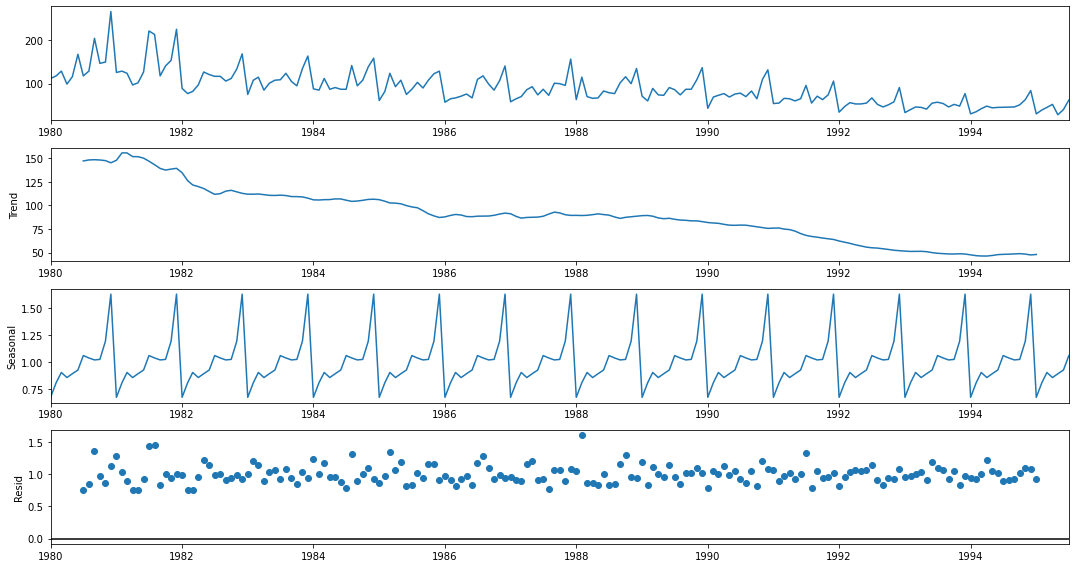

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df2,model='multiplicative')
decomposition.plot();

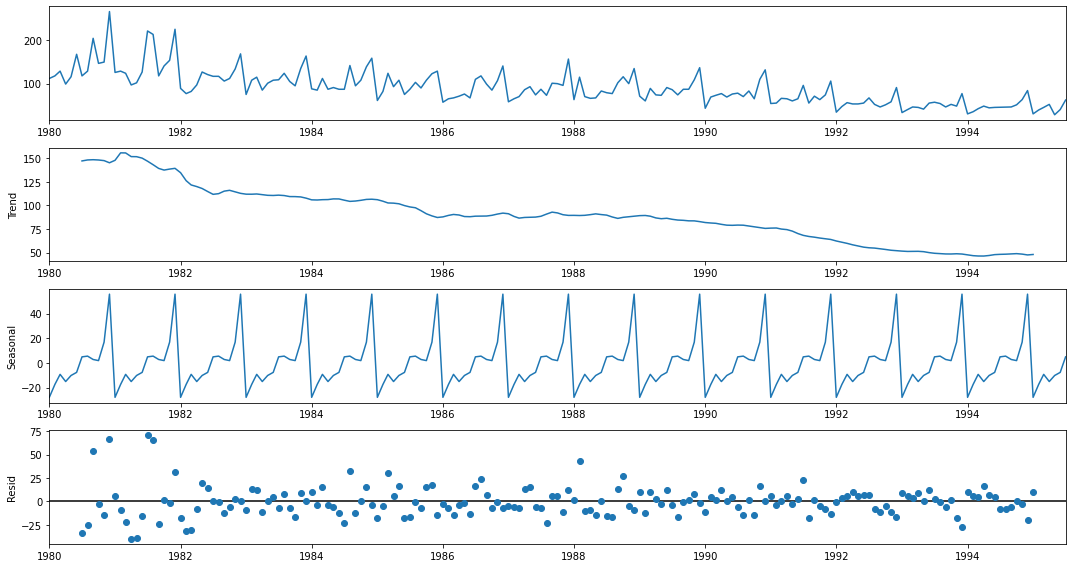

In [166]:
decomposition = seasonal_decompose(df2,model='additive')
decomposition.plot();

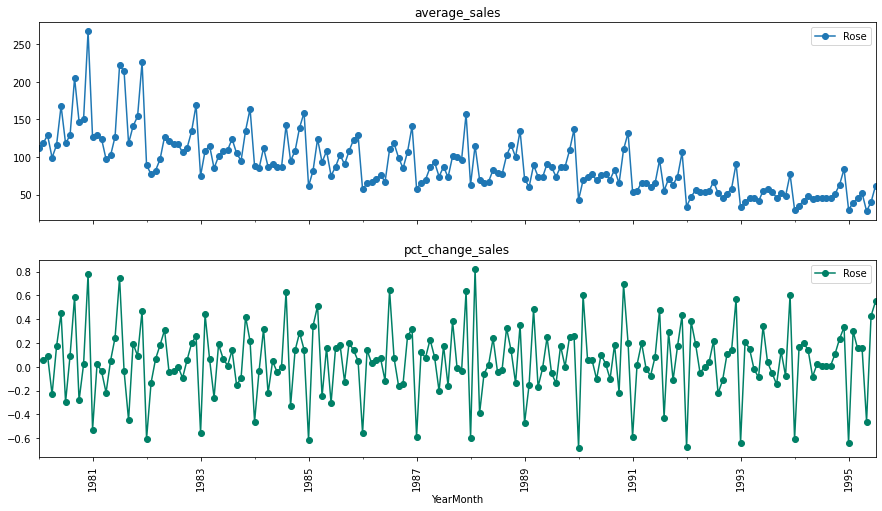

In [167]:
# group by date and get average Customers, and precent change
average_sales    = df2.groupby(df2.index)["Rose"].mean()
pct_change_sales = df2.groupby(df2.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="average_sales")

ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="pct_change_sales")

Splitting the data

In [168]:
train = df2[df2.index<'1991'] 
test = df2[df2.index>='1991']

In [169]:
print(train.head(),'\n')
print(train.tail(),'\n\n')
print(test.head(),'\n')
print(test.tail(),'\n')

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

             Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 


            Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

            Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [170]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [171]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [172]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874933517484011,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38703609891138,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [173]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    87.104984
1991-02-01    87.104984
1991-03-01    87.104984
1991-04-01    87.104984
1991-05-01    87.104984
1991-06-01    87.104984
1991-07-01    87.104984
1991-08-01    87.104984
1991-09-01    87.104984
1991-10-01    87.104984
1991-11-01    87.104984
1991-12-01    87.104984
1992-01-01    87.104984
1992-02-01    87.104984
1992-03-01    87.104984
1992-04-01    87.104984
1992-05-01    87.104984
1992-06-01    87.104984
1992-07-01    87.104984
1992-08-01    87.104984
1992-09-01    87.104984
1992-10-01    87.104984
1992-11-01    87.104984
1992-12-01    87.104984
1993-01-01    87.104984
1993-02-01    87.104984
1993-03-01    87.104984
1993-04-01    87.104984
1993-05-01    87.104984
1993-06-01    87.104984
1993-07-01    87.104984
1993-08-01    87.104984
1993-09-01    87.104984
1993-10-01    87.104984
1993-11-01    87.104984
1993-12-01    87.104984
1994-01-01    87.104984
1994-02-01    87.104984
1994-03-01    87.104984
1994-04-01    87.104984
1994-05-01    87.104984
1994-06-01    87

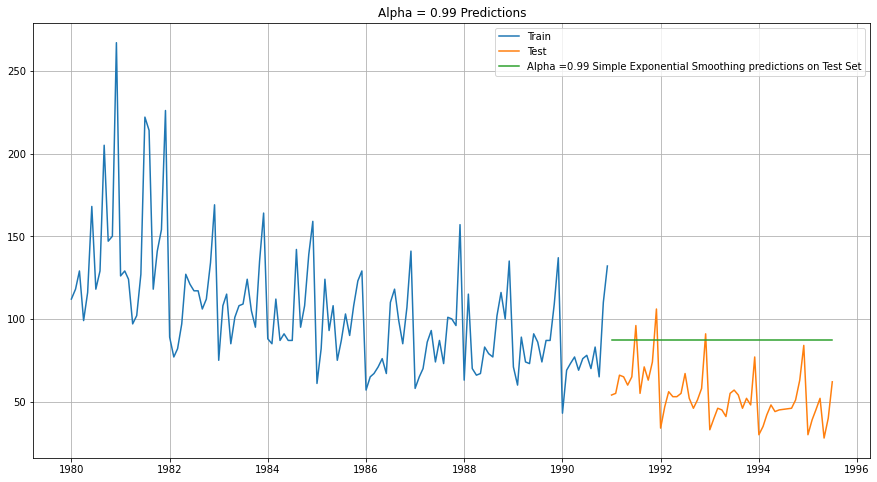

In [174]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');


In [175]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100


In [176]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])


SES RMSE: 36.79622798367751
SES RMSE (calculated using statsmodels): 36.796227983677504


In [177]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

Test RMSE
Alpha=0.99,SES  36.796228

Holt - ETS(A, A, N) - Holt's linear method with additive error



Double Exponential Smoothing


In [178]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [179]:
print('')
print('Holt model Exponential Smoothing Estimated Parameters')
print('')
print(model_DES.params)



Holt model Exponential Smoothing Estimated Parameters

{'smoothing_level': 1.9086427682180844e-08, 'smoothing_trend': 7.302464353829351e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81629861505857, 'initial_trend': -0.4943753249082896, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [180]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    72.064380
1991-02-01    71.570005
1991-03-01    71.075630
1991-04-01    70.581254
1991-05-01    70.086879
1991-06-01    69.592504
1991-07-01    69.098128
1991-08-01    68.603753
1991-09-01    68.109378
1991-10-01    67.615002
1991-11-01    67.120627
1991-12-01    66.626252
1992-01-01    66.131877
1992-02-01    65.637501
1992-03-01    65.143126
1992-04-01    64.648751
1992-05-01    64.154375
1992-06-01    63.660000
1992-07-01    63.165625
1992-08-01    62.671249
1992-09-01    62.176874
1992-10-01    61.682499
1992-11-01    61.188123
1992-12-01    60.693748
1993-01-01    60.199373
1993-02-01    59.704997
1993-03-01    59.210622
1993-04-01    58.716247
1993-05-01    58.221871
1993-06-01    57.727496
1993-07-01    57.233121
1993-08-01    56.738745
1993-09-01    56.244370
1993-10-01    55.749995
1993-11-01    55.255619
1993-12-01    54.761244
1994-01-01    54.266869
1994-02-01    53.772493
1994-03-01    53.278118
1994-04-01    52.783743
1994-05-01    52.289367
1994-06-01    51

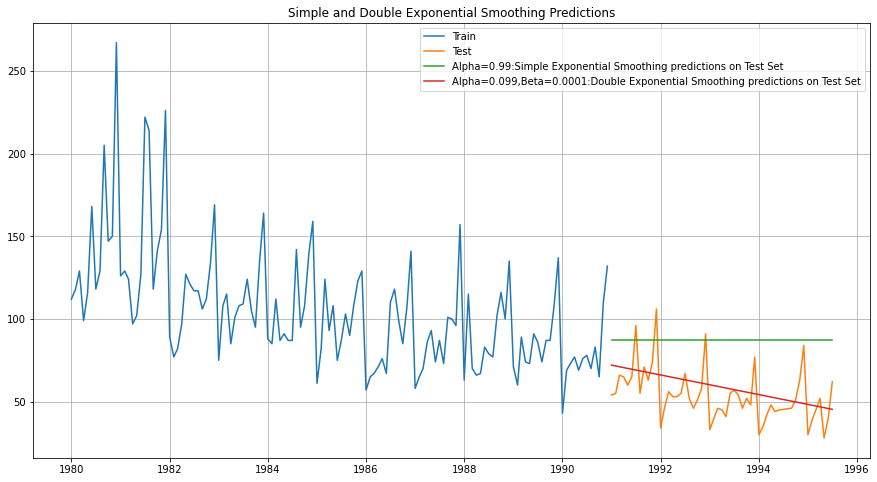

In [181]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');


In [182]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))


DES RMSE: 15.269327872865668


In [183]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.99,SES           36.796228
Alpha=1,Beta=0.0189:DES  15.269328

Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [184]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [185]:
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08830330642635406, 'smoothing_trend': 6.730635331927582e-05, 'smoothing_seasonal': 0.004455138229351625, 'damping_trend': nan, 'initial_level': 146.88752868155674, 'initial_trend': -0.5492163940406024, 'initial_seasons': array([-31.12207537, -18.81171138, -10.86052241, -21.52235816,
       -12.68359535,  -7.17529564,   2.7456236 ,   8.84900094,
         4.85724354,   2.9520333 ,  21.05004912,  63.29916317]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [186]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01     42.672382
1991-02-01     54.439917
1991-03-01     61.841877
1991-04-01     50.636896
1991-05-01     58.918913
1991-06-01     63.870294
1991-07-01     73.240626
1991-08-01     78.790723
1991-09-01     74.257853
1991-10-01     71.805821
1991-11-01     89.354796
1991-12-01    131.072194
1992-01-01     36.081787
1992-02-01     47.849323
1992-03-01     55.251283
1992-04-01     44.046301
1992-05-01     52.328318
1992-06-01     57.279699
1992-07-01     66.650031
1992-08-01     72.200129
1992-09-01     67.667259
1992-10-01     65.215226
1992-11-01     82.764201
1992-12-01    124.481599
1993-01-01     29.491193
1993-02-01     41.258728
1993-03-01     48.660688
1993-04-01     37.455706
1993-05-01     45.737724
1993-06-01     50.689105
1993-07-01     60.059436
1993-08-01     65.609534
1993-09-01     61.076664
1993-10-01     58.624632
1993-11-01     76.173607
1993-12-01    117.891005
1994-01-01     22.900598
1994-02-01     34.668134
1994-03-01     42.070093
1994-04-01     30.865112


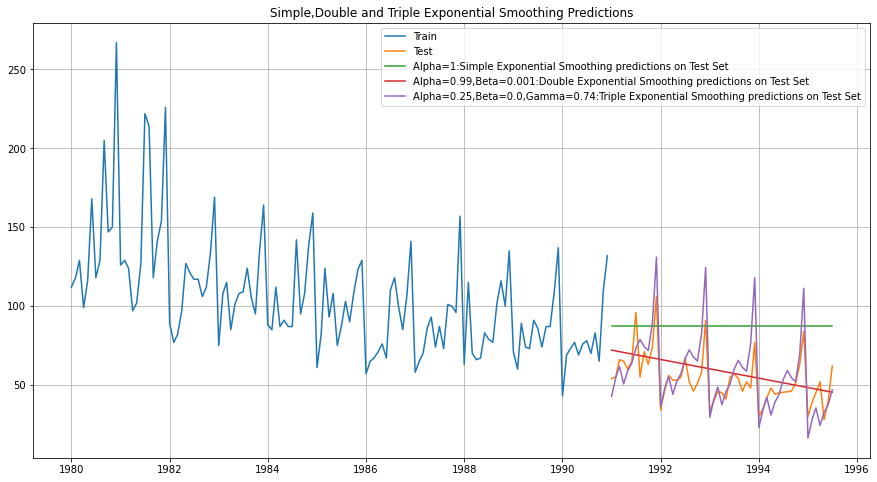

In [187]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [188]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.99,SES                      36.796228
Alpha=1,Beta=0.0189:DES             15.269328
Alpha=0.25,Beta=0.0,Gamma=0.74:TES  14.265713

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

In [189]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07132109562890512, 'smoothing_trend': 0.04553831096563722, 'smoothing_seasonal': 8.356711212063695e-07, 'damping_trend': nan, 'initial_level': 134.25655591779326, 'initial_trend': -0.8038265942903572, 'initial_seasons': array([0.83746068, 0.94985307, 1.03812083, 0.90732186, 1.02043162,
       1.11131741, 1.22228039, 1.30104211, 1.23132915, 1.20610008,
       1.40577823, 1.93832412]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [190]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am



1991-01-01     56.334597
1991-02-01     63.692059
1991-03-01     69.388935
1991-04-01     60.452304
1991-05-01     67.770362
1991-06-01     73.568837
1991-07-01     80.653311
1991-08-01     85.572391
1991-09-01     80.724066
1991-10-01     78.812306
1991-11-01     91.559770
1991-12-01    125.830690
1992-01-01     54.186661
1992-02-01     61.255856
1992-03-01     66.726340
1992-04-01     58.125185
1992-05-01     65.153138
1992-06-01     70.718509
1992-07-01     77.518382
1992-08-01     82.235452
1992-09-01     77.565928
1992-10-01     75.718876
1992-11-01     87.954200
1992-12-01    120.859237
1993-01-01     52.038725
1993-02-01     58.819652
1993-03-01     64.063746
1993-04-01     55.798066
1993-05-01     62.535913
1993-06-01     67.868180
1993-07-01     74.383453
1993-08-01     78.898513
1993-09-01     74.407789
1993-10-01     72.625445
1993-11-01     84.348631
1993-12-01    115.887785
1994-01-01     49.890789
1994-02-01     56.383449
1994-03-01     61.401152
1994-04-01     53.470947


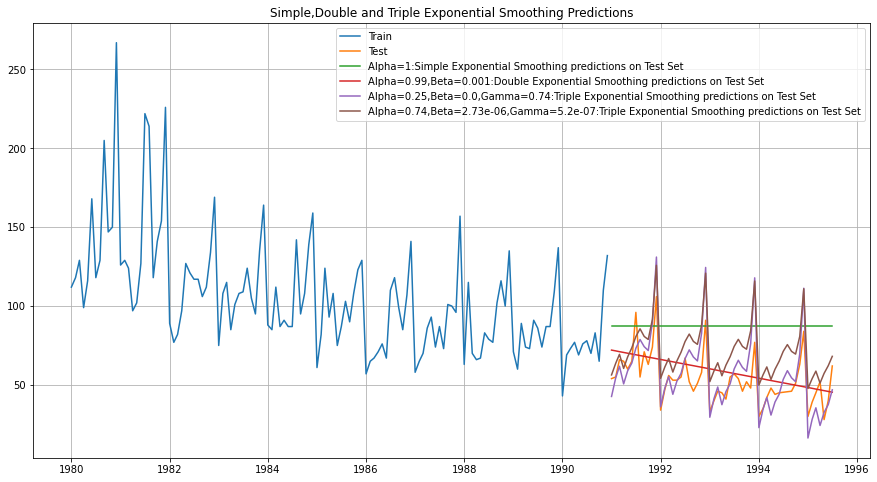

In [191]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');


Report model accuracy

In [192]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf


TES_am RMSE: 20.190997935033817


Test RMSE
Alpha=0.99,SES                                      36.796228
Alpha=1,Beta=0.0189:DES                             15.269328
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                  14.265713
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES  20.190998

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set.  

Linear Regression

In [193]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


In [194]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [195]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0   256
1991-02-01  55.0   257
1991-03-01  66.0   258
1991-04-01  65.0   259
1991-05-01  60.0   260

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   306
1995-04-01  52.0   307
1995-05-01  28.0   308
1995-06-01  40.0   309
1995-07-01  62.0   310

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
lr = LinearRegression()

In [198]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

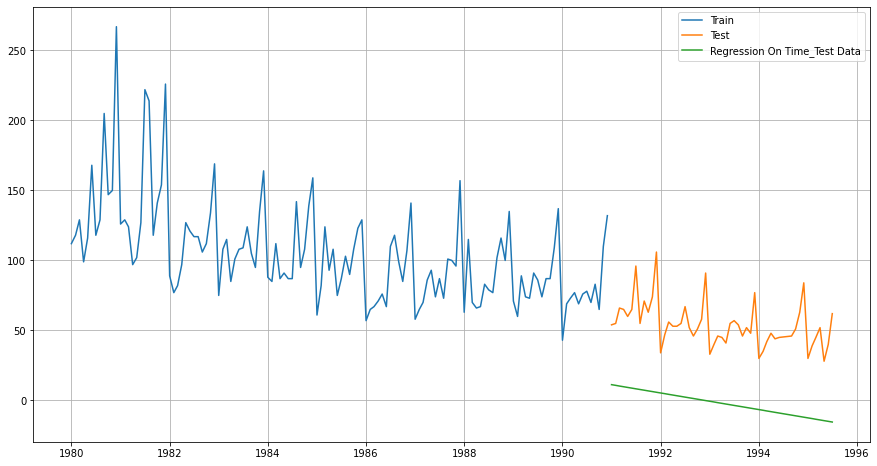

In [199]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [200]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 57.790 


In [201]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  57.790054

Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡

In [202]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [203]:
train.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [204]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

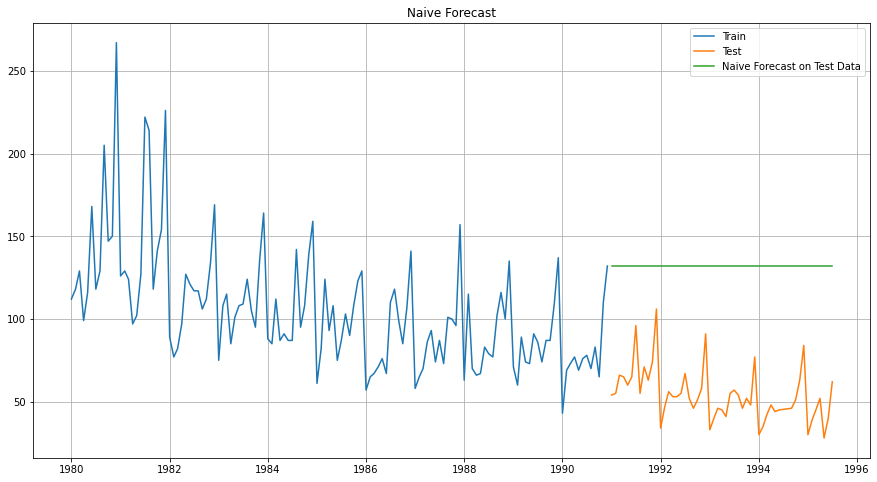

In [205]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

In [206]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [207]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  57.790054
NaiveModel        79.718773

Method 3: Simple Average

In [208]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [209]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

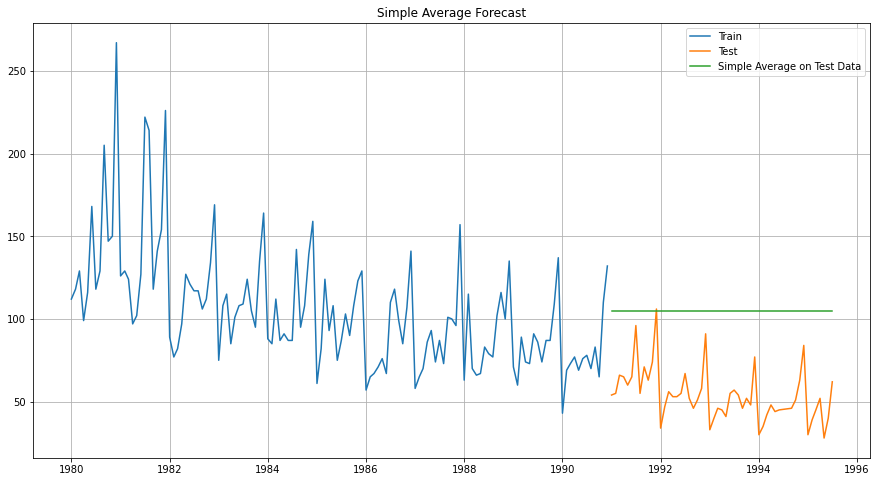

In [210]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Model Evaluation

In [211]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [212]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    57.790054
NaiveModel          79.718773
SimpleAverageModel  53.460570

Moving Average(MA)

In [213]:
MovingAverage = df2.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [214]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

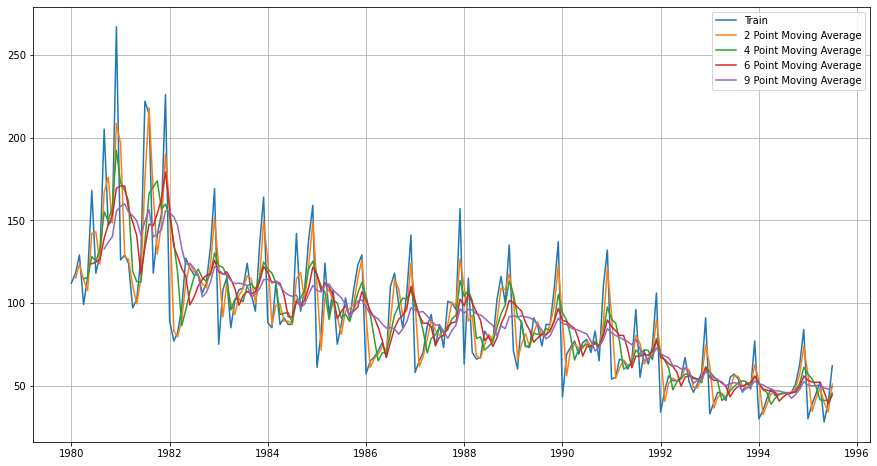

In [215]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [216]:
#Creating train and test set 
trailing_MovingAverage_train= MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

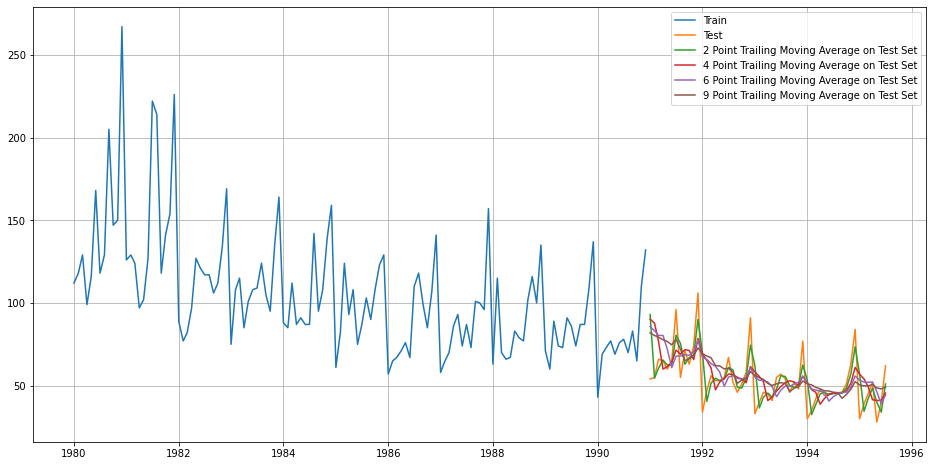

In [217]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

Model Evaluation

In [218]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [219]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             57.790054
NaiveModel                   79.718773
SimpleAverageModel           53.460570
2pointTrailingMovingAverage  11.529278
4pointTrailingMovingAverage  14.451403
6pointTrailingMovingAverage  14.566327
9pointTrailingMovingAverage  14.727630

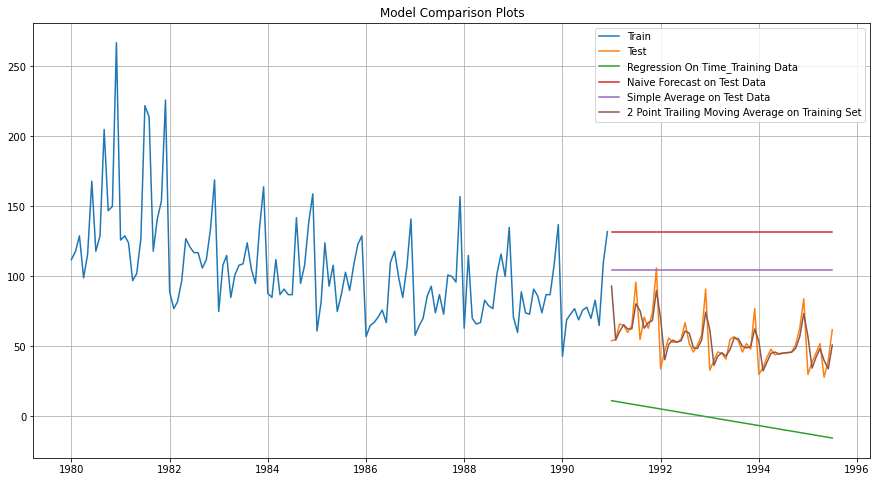

In [220]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

 Test for stationarity of the series - Dicky Fuller test

In [221]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

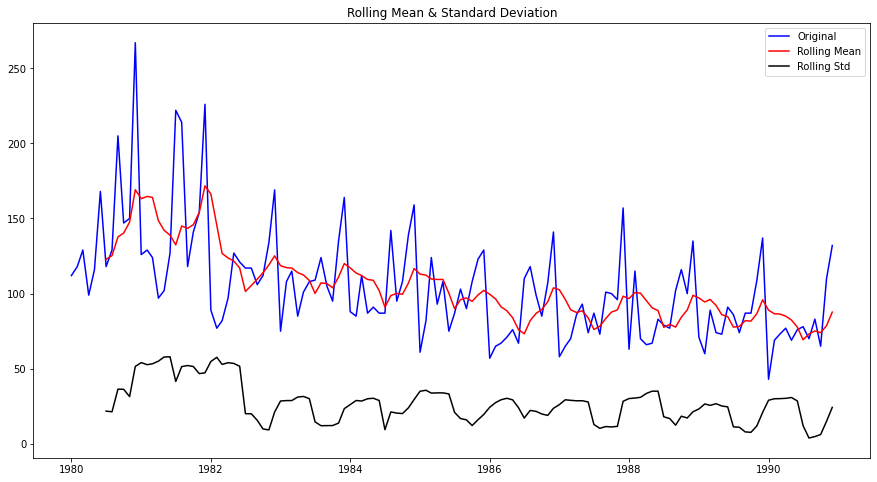

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [222]:
test_stationarity(train['Rose'])

We see that the data is not stationary. We will go ahead and take appropriate levels of differencing to make the data stationary.

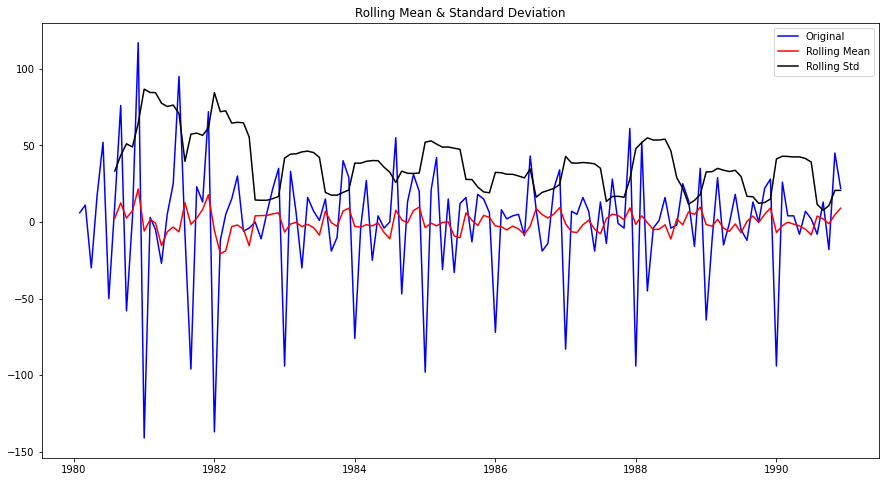

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [223]:
test_stationarity(train.diff().dropna())


Now the data is stationary

ARIMA

In [224]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we have already taken a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))


Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [225]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [226]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535752
ARIMA(0, 1, 3) - AIC:1280.5453761734652
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380076
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(1, 1, 3) - AIC:1281.870722330997
ARIMA(2, 1, 0) - AIC:1298.6110341604908
ARIMA(2, 1, 1) - AIC:1281.507862186858
ARIMA(2, 1, 2) - AIC:1281.8707222264168


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:1274.6953190416875
ARIMA(3, 1, 0) - AIC:1297.4810917271702
ARIMA(3, 1, 1) - AIC:1282.419277627203
ARIMA(3, 1, 2) - AIC:1283.720740597714
ARIMA(3, 1, 3) - AIC:1278.6543993387522


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [227]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695319
15  (3, 1, 3)  1278.654399
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [229]:
mod = ARIMA(train['Rose'], order=(2,1,3))

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [230]:
results_Arima = mod.fit()

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [231]:
print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 20 Feb 2022   AIC                           1274.695
Time:                        16:42:02   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6780      0.084    -20.029      0.000      -1.842      -1.514
ar.L2         -0.7287      0.084     -8.697      0.000      -0.893      -0.565
ma.L1          1.0447      0.616      1.695      0.0

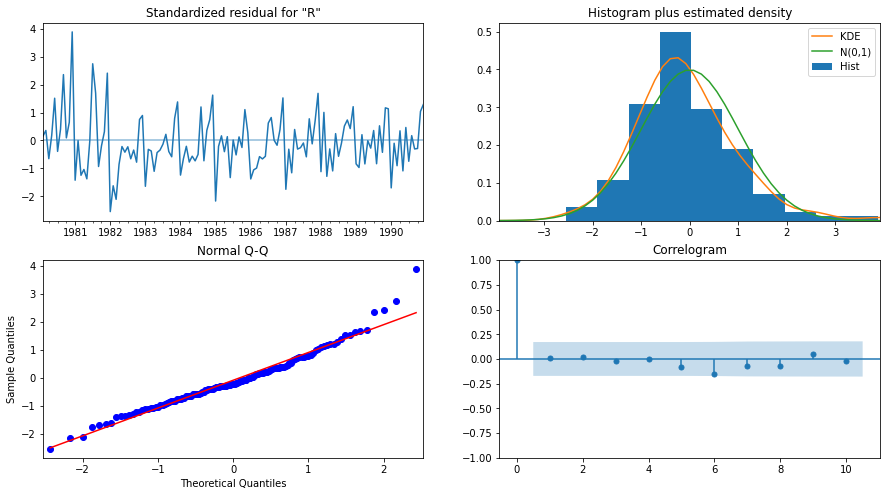

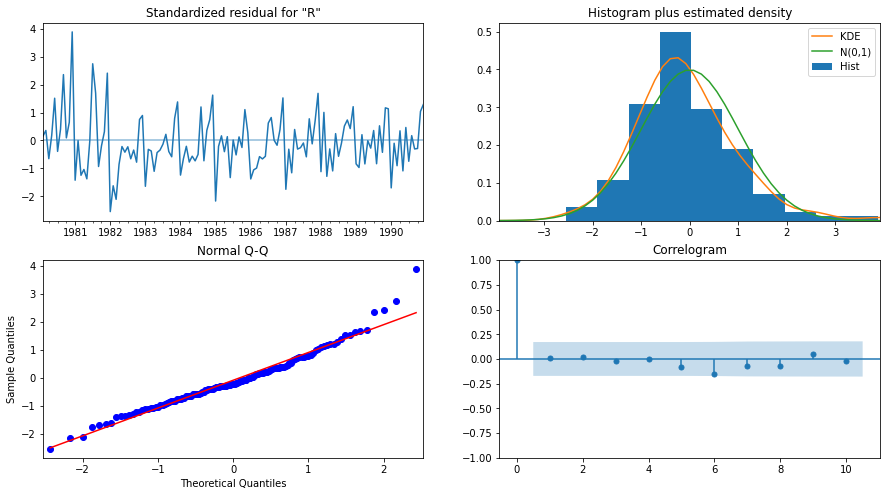

In [232]:
results_Arima.plot_diagnostics()

Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE


In [233]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [234]:
from sklearn.metrics import mean_squared_error
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA


1991-01-01    85.592932
1991-02-01    90.547211
1991-03-01    81.963691
1991-04-01    92.756336
1991-05-01    80.901574
1991-06-01    92.928681
1991-07-01    81.386383
1991-08-01    91.989584
1991-09-01    82.608874
1991-10-01    90.622618
1991-11-01    84.011748
1991-12-01    89.264777
1992-01-01    85.267859
1992-02-01    88.146550
1992-03-01    86.228852
1992-04-01    87.348913
1992-05-01    86.866964
1992-06-01    86.859438
1992-07-01    87.223281
1992-08-01    86.618243
1992-09-01    87.368341
1992-10-01    86.550602
1992-11-01    87.376131
1992-12-01    86.586822
1993-01-01    87.309677
1993-02-01    86.671936
1993-03-01    87.215284
1993-04-01    86.768300
1993-05-01    87.122375
1993-06-01    86.853976
1993-07-01    87.046318
1993-08-01    86.919164
1993-09-01    86.992360
1993-10-01    86.962199
1993-11-01    86.959467
1993-12-01    86.986031
1994-01-01    86.943449
1994-02-01    86.995543
1994-03-01    86.939161
1994-04-01    86.995806
1994-05-01    86.941844
1994-06-01    86

In [235]:
results_Arima.predict(start=pd.to_datetime('1991-01-01'),end=pd.to_datetime('1995-12-01 '),typ = 'level',dynamic=True,full_results=True)

1991-01-01    85.592932
1991-02-01    90.547211
1991-03-01    81.963691
1991-04-01    92.756336
1991-05-01    80.901574
1991-06-01    92.928681
1991-07-01    81.386383
1991-08-01    91.989584
1991-09-01    82.608874
1991-10-01    90.622618
1991-11-01    84.011748
1991-12-01    89.264777
1992-01-01    85.267859
1992-02-01    88.146550
1992-03-01    86.228852
1992-04-01    87.348913
1992-05-01    86.866964
1992-06-01    86.859438
1992-07-01    87.223281
1992-08-01    86.618243
1992-09-01    87.368341
1992-10-01    86.550602
1992-11-01    87.376131
1992-12-01    86.586822
1993-01-01    87.309677
1993-02-01    86.671936
1993-03-01    87.215284
1993-04-01    86.768300
1993-05-01    87.122375
1993-06-01    86.853976
1993-07-01    87.046318
1993-08-01    86.919164
1993-09-01    86.992360
1993-10-01    86.962199
1993-11-01    86.959467
1993-12-01    86.986031
1994-01-01    86.943449
1994-02-01    86.995543
1994-03-01    86.939161
1994-04-01    86.995806
1994-05-01    86.941844
1994-06-01    86

In [236]:
RMSE_autoARIMA = mean_squared_error(test['Rose'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['Rose'],predicted_autoARIMA)

In [237]:
print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 36.81634749426474 
MAPE for the autofit ARIMA model: 63.9


In [238]:
resultsDf = pd.DataFrame({'RMSE': [RMSE_autoARIMA],'MAPE':[MAPE_autoARIMA]}
                           ,index=['ARIMA(2,1,3)'])

resultsDf

RMSE  MAPE
ARIMA(2,1,3)  36.816347  63.9

SARIMA

In [240]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [241]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC


Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [242]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113863
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827322
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.271383062524
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149089
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721867
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.986174312437
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515088
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.022442617828
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.804820641965
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.5465834695271
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765139873
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.042505301648
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8917095262093
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029548
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AI

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1068.4781627387706
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.6734607524152
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:965.1763959606204
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:974.125877864896
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:975.8068385702204
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:967.6521341296803
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:967.1740891873808
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.9102116146698
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1185.7691934897082
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.5581033340713
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1005.4894643085271
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1200.4217492510952
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.7283325558597
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103215273422
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:996.8723993246779
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457923378
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.0771798927149
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.2203966608638
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:

In [243]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
187  (2, 1, 3)  (2, 0, 3, 6)  951.744297
59   (0, 1, 3)  (2, 0, 3, 6)  952.073632
251  (3, 1, 3)  (2, 0, 3, 6)  952.582101
191  (2, 1, 3)  (3, 0, 3, 6)  953.205621
123  (1, 1, 3)  (2, 0, 3, 6)  953.684951

In [244]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sun, 20 Feb 2022   AIC                            951.744
Time:                                   17:12:09   BIC                            981.349
Sample:                               01-01-1980   HQIC                           963.750
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.083     -6.082      0.000      -0.665      -0.341
ar.L2         -0.6628      0.084     -7.918

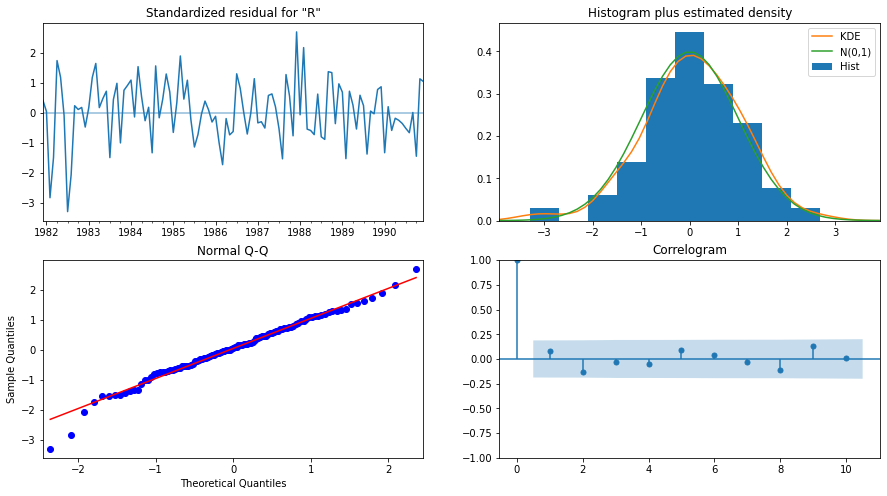

In [245]:
results_auto_SARIMA.plot_diagnostics();


Predict on the Test Set using this model and evaluate the model.


In [246]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))


In [247]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  66.900092  16.350226      34.854239      98.945946
1991-02-01  65.988158  16.481446      33.685118      98.291198
1991-03-01  74.438688  16.587371      41.928039     106.949337
1991-04-01  76.040407  16.709956      43.289494     108.791320
1991-05-01  78.415084  16.710569      45.662970     111.167198

In [248]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = MAPE(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)


RMSE: 27.124435414602782 
MAPE: 47.31


In [249]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])

In [250]:
resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE   MAPE
ARIMA(2,1,3)            36.816347  63.90
SARIMA(2,1,3)(2,0,3,6)  27.124435  47.31

Check the ACF and PACF of the training data.

In [251]:
train_diff = train.diff(periods=1).dropna()
train_diff

Rose
YearMonth       
1980-02-01   6.0
1980-03-01  11.0
1980-04-01 -30.0
1980-05-01  17.0
1980-06-01  52.0
...          ...
1990-08-01  -8.0
1990-09-01  13.0
1990-10-01 -18.0
1990-11-01  45.0
1990-12-01  22.0

[131 rows x 1 columns]

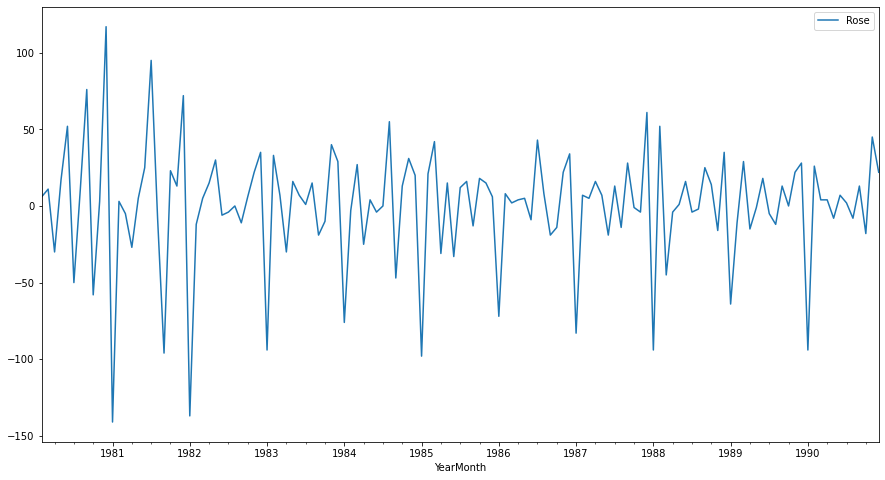

In [252]:
train_diff.plot();

In [253]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

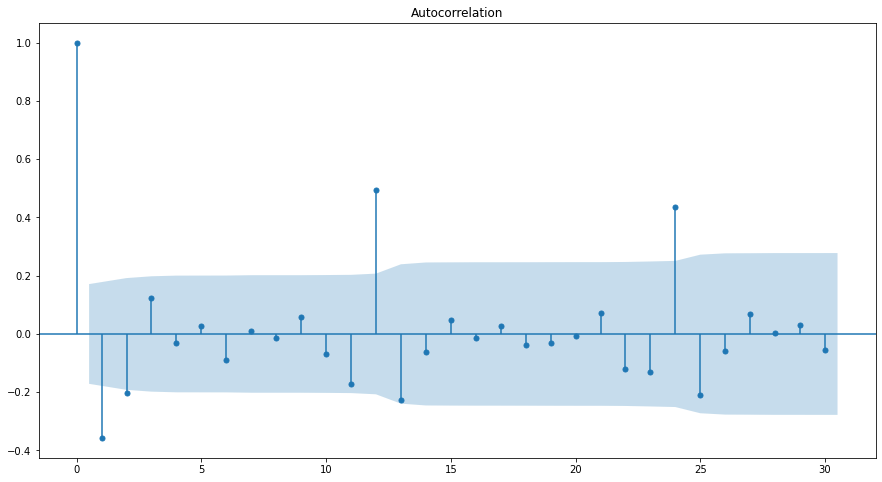

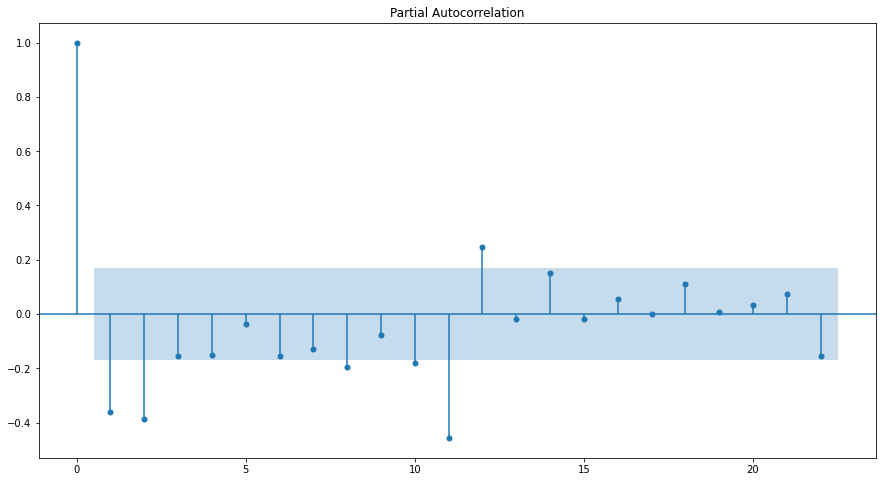

In [254]:
plot_acf(train_diff,lags=30)
plot_pacf(train_diff);

Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

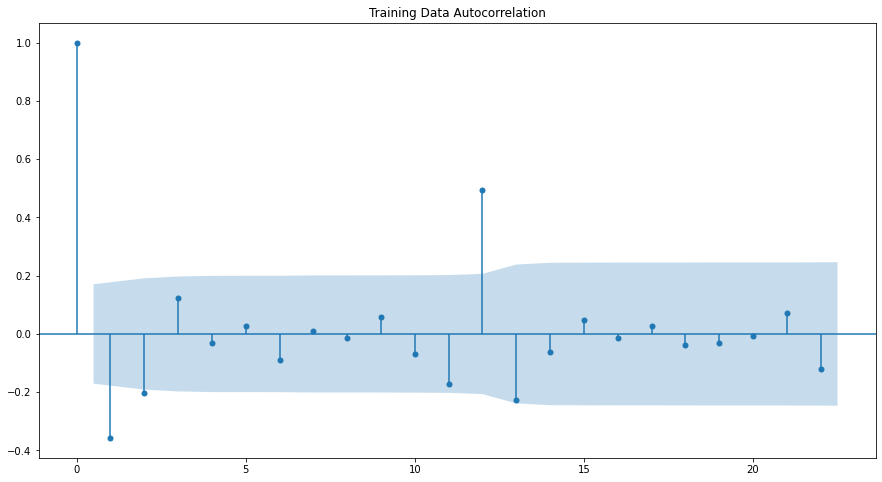

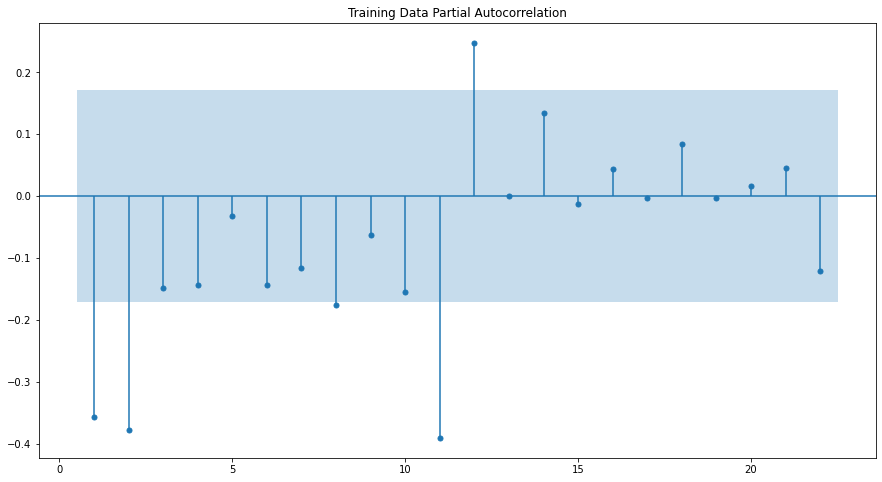

In [255]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.
By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.


In [256]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535752
ARIMA(0, 1, 3) - AIC:1280.5453761734652
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380076
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(1, 1, 3) - AIC:1281.870722330997
ARIMA(2, 1, 0) - AIC:1298.6110341604908
ARIMA(2, 1, 1) - AIC:1281.507862186858
ARIMA(2, 1, 2) - AIC:1281.8707222264168


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:1274.6953190416875
ARIMA(3, 1, 0) - AIC:1297.4810917271702
ARIMA(3, 1, 1) - AIC:1282.419277627203
ARIMA(3, 1, 2) - AIC:1283.720740597714
ARIMA(3, 1, 3) - AIC:1278.6543993387522


C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [257]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
27  (2, 1, 3)  1274.695319
11  (2, 1, 3)  1274.695319
15  (3, 1, 3)  1278.654399
31  (3, 1, 3)  1278.654399
2   (0, 1, 2)  1279.671529

In [260]:
mod = ARIMA(train['Rose'], order=(2,1,3))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 20 Feb 2022   AIC                           1274.695
Time:                        17:26:21   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6780      0.084    -20.029      0.000      -1.842      -1.514
ar.L2         -0.7287      0.084     -8.697      0.000      -0.893      -0.565
ma.L1          1.0447      0.616      1.695      0.0

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


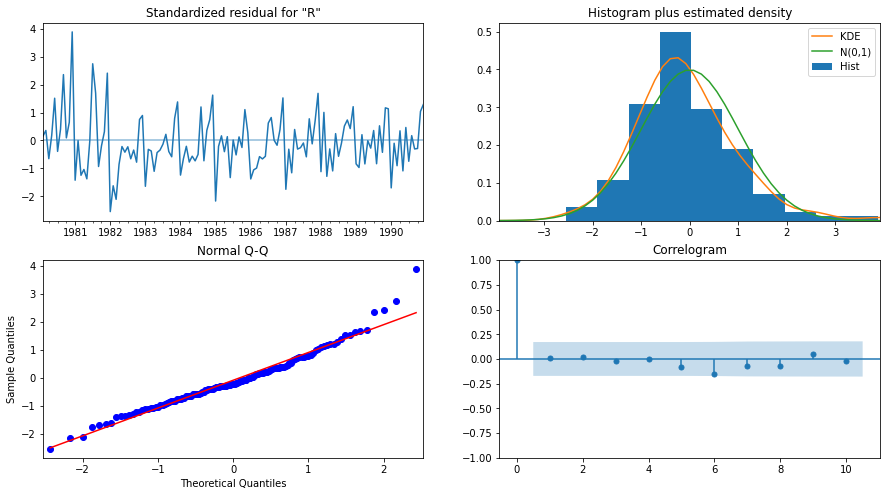

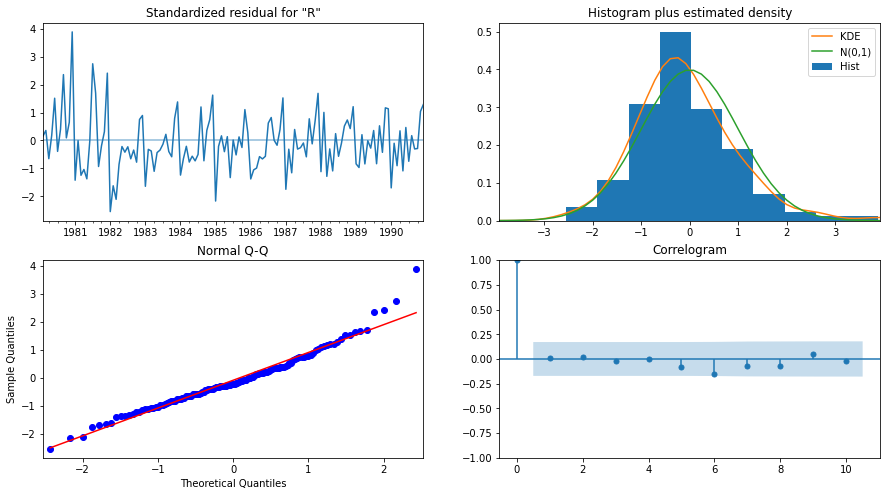

In [265]:
results_Arima.plot_diagnostics()

Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE


In [261]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape


In [262]:
from sklearn.metrics import mean_squared_error

predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1991-01-01    85.592932
1991-02-01    90.547211
1991-03-01    81.963691
1991-04-01    92.756336
1991-05-01    80.901574
1991-06-01    92.928681
1991-07-01    81.386383
1991-08-01    91.989584
1991-09-01    82.608874
1991-10-01    90.622618
1991-11-01    84.011748
1991-12-01    89.264777
1992-01-01    85.267859
1992-02-01    88.146550
1992-03-01    86.228852
1992-04-01    87.348913
1992-05-01    86.866964
1992-06-01    86.859438
1992-07-01    87.223281
1992-08-01    86.618243
1992-09-01    87.368341
1992-10-01    86.550602
1992-11-01    87.376131
1992-12-01    86.586822
1993-01-01    87.309677
1993-02-01    86.671936
1993-03-01    87.215284
1993-04-01    86.768300
1993-05-01    87.122375
1993-06-01    86.853976
1993-07-01    87.046318
1993-08-01    86.919164
1993-09-01    86.992360
1993-10-01    86.962199
1993-11-01    86.959467
1993-12-01    86.986031
1994-01-01    86.943449
1994-02-01    86.995543
1994-03-01    86.939161
1994-04-01    86.995806
1994-05-01    86.941844
1994-06-01    86

In [263]:
RMSE_autoARIMA = mean_squared_error(test['Rose'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['Rose'],predicted_autoARIMA)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 36.81634749426474 
MAPE for the autofit ARIMA model: 63.9


In [264]:
resultsDf = pd.DataFrame({'RMSE': [RMSE_autoARIMA],'MAPE':[MAPE_autoARIMA]}
                           ,index=['ARIMA(2,1,3)'])

resultsDf

RMSE  MAPE
ARIMA(2,1,3)  36.816347  63.9

SARIMA using ACF and PACF

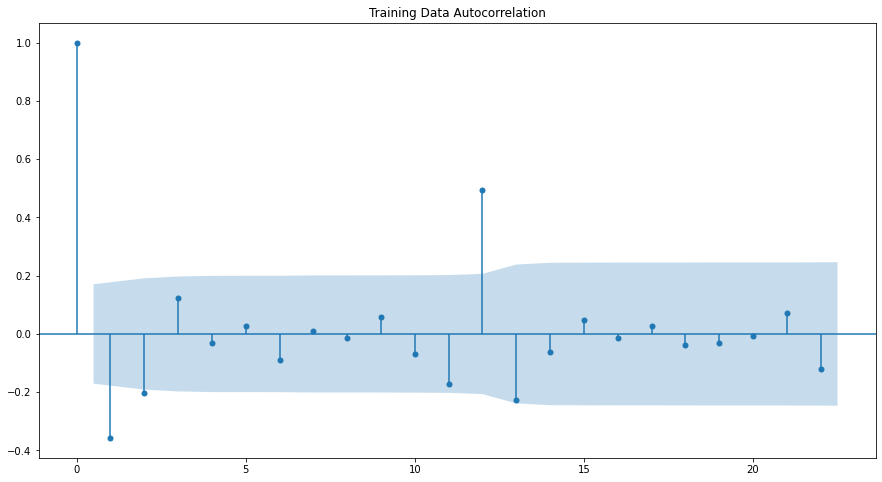

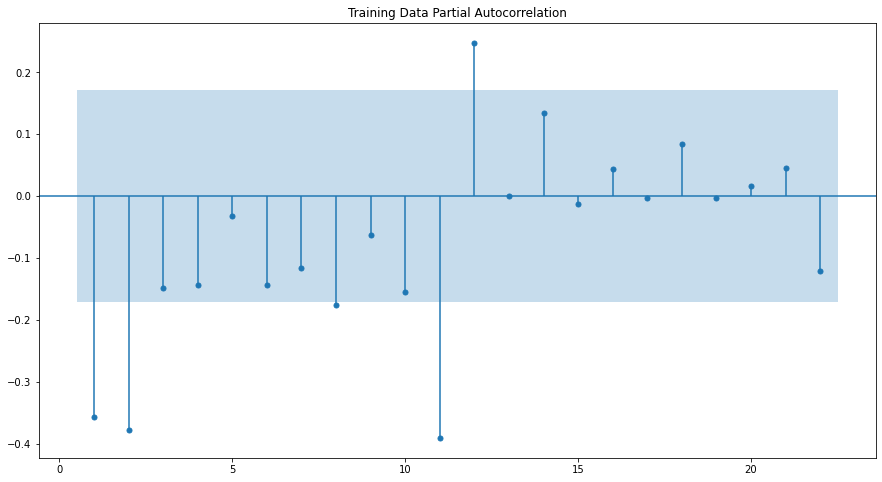

In [266]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6. We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

In [267]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(0, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Myuri N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 6)   Log Likelihood                -534.279
Date:                           Sun, 20 Feb 2022   AIC                           1082.558
Time:                                   18:17:25   BIC                           1101.833
Sample:                               01-01-1980   HQIC                          1090.383
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4184      0.430      0.973      0.330      -0.424       1.261
ar.L2         -0.2743      0.185     -1.484

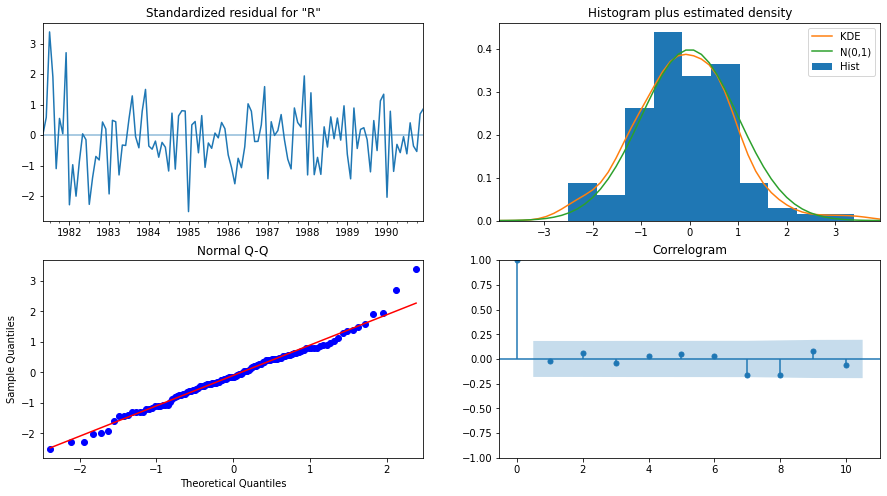

In [268]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

Predict on the Test Set using this model and evaluate the model.

In [269]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [271]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = MAPE(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 31.36583646923991 
MAPE: 52.86


In [272]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(2,1,2)(0,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE   MAPE
ARIMA(2,1,3)            36.816347  63.90
SARIMA(2,1,2)(0,0,2,6)  31.365836  52.86